# The Smith Parasite Project <img align='right' width='120' height='150' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>

## <font color='SeaGreen'>__Machine Learning__</font><br>

> Group composed by:
>> __Ana Carolina Ottavi, nº20220541__ <p>
>> __Carolina Bezerra, nº20220392__ <p>
>> __Daniel Franco, nº20210719__ <p>
>> __Rafael Dinis, nº20221643__ <p>
>> __Tomas Vicente, nº20221355__ <p>
    
***

## 📖 Introduction
    
Within the scope of __Machine Learning__, it was proposed a project, where the students' ability to __build a Predictive  model__ in accordance with a specific challenge would be tested. The problem consists on an ilness called __Smith Parasite__ , a diesease recently discovered by Dr. Smith in England, that has already infected __more than 5000 people, with no apparent connection between them.__
    
__The most common symptoms include fever and tiredness, but some infected people are asymptomatic__. Regardless, this virus is being associated with post-disease conditions such as loss of speech, confusion, chest pain and shortness of breath.

__The conditions of the transmission of the disease are still unknown__ and __there are no certainties of what leads a Patient to suffer or not from it__. Nonetheless, __some groups of people seem more prone to be infected by the parasite than others__.
    
So the challenge, is to build a predictive model that answers the following questions:
    
> * __Who are the groups of individuals more likely to suffer from the Smith Parasite?__ <p>
> * __Can a model predict if a Patient will suffer, or not, from the Smith Disease with high precision?__ <p>
> * __If yes, what are the main drivers for an individual to have the disease?__

The objetive is to analyze and transform the data available as needed and apply different predictive models to answer the main question __if whether a Patient will suffer, or not, from the Smith Disease__ (Disease = 1) or not (Disease = 0). Since the target can only possibly fall into two categories __(Diseased or Not Diseased)__, therefor this is a Classification problem. 
    
__"A classification problem requires that examples be classified into one of two or more classes. A classification can have real-valued or discrete input variables. A problem with two classes is often called a two-class or binary classification problem."__ 
    
Source:<p> 
> * https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/
 
__The benchmark the precision of the models, the F1-score will be the indicator considered to determine if the model is predicts correctly.__
The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers.
    
***    
### 💾 Data 

The data provided gives __access to a small quantity of sociodemographic, health, and behavioral information obtained from the Patients__. Its divided by sets of training and test data. __The training data will be the one used to build the machine learning models__. In this set, there's also the __ground truth associated to each Patient, i.e., if the Patient has the disease or not__.
The test set will be used __to see how well the model performs on unseen data__, since it provides no access to the __ground truth__.
    
There are available 6 sets of csv files:

>> * __Train & Test Demo - the training and test sets for demographic data and the target__ <p>
>> * __Train & Test Health - the training and test sets for health related data__ <p>
>> * __Train & Test Habits - the training and test sets for habits related data__ <p>
    
<br>
<details open>
    <summary> 
       <font color='SeaGreen' size =3>Click here to SEE/HIDE Feature Description</font>
    </summary><br>
    
### Sociodemographic Data <p>
- __PatientID__ - The unique identifier of the Patient <p>
- __Name__ - The name of the Patient <p>
- __Birth Year__ - Patient Year of Birth <p>
- __Region__ - Patient Living Region <p>
- __Education__ - What is the highest grade or year of school you have? <p>
- __Disease__ - If the Patient has the disease (Disease = 1) or not (Disease = 0) <p>
    
### Habits Related Data <p>
- __Smoking Habit__ - Do you smoke more than 10 cigars daily? <p>
- __Drinking Habit__ - What is your behavior concerning alcohol consumption? <p>
- __Exercise__ - Do you exercise (more than 30 minutes) 3 times per week or more? <p>
- __Fruit Habit__ - How many portions of fruits do you consume per day? <p>
- __Water Habit__ - How much water do you drink per day? <p>
    
### Health Related Data <p>
- __Height__ - Patient’s height <p>
- __Weight__ - Patient’s weight <p>
- __High Cholesterol__ - Cholesterol value <p>
- __Blood Pressure__ - Blood Pressure in rest value <p>
- __Mental Health__ - During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation? <p>
- __Physical Health__ - Thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good to the point where it was difficult to walk?  <p>
- __Checkup__ - How long has it been since you last visited a doctor for a routine Checkup? <p>
- __Diabetes__ - (Ever told) you or your direct relatives have diabetes?

***
### 📋 Index

> #### 1. Data Collection
> #### 2. Data Understanding
>> ##### 2.1 Data Info & Summary Statistics
>> ##### 2.2 Data Quality Verification
> #### 3. Exploratory Data Analysis
>> ##### 3.1 Data Split
>> ##### 3.2 Duplicates
>> ##### 3.3 Missing Values
>> ##### 3.4 Outliers Study
>>> ##### 3.4.1 Manual Approach
>>> ##### 3.4.1 IQR Approach
>> ##### 3.5 Data Exploration
> #### 4. Feature Engineering
>> ##### 4.1 Feature Selection
> #### 5. Modelling & Assessment
>> ##### 5.1 Model Selection
> #### 6. Deployment

## Ultima divisao   --DEADLINE 23 DEZ--

'''
DANIEL - justificar escolha modelos
CAROL - exploração + inicio relatorio
ANA CAROL - exploração + inicio relatorio
RAFAEL - justificar escolha modelos
TOMAS - chi-squared
'''

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to SEE/HIDE Raw Code"></form>''')

***
## <font color='SeaGreen'> 1. Data Collection </font>
Importing Libraries, __Data Extraction and Merging datasets accordingly to its nature, i.e., if its train or test data.__ <p>

In [154]:
# magic commands
%autosave 90
%matplotlib inline

# libraries
import os
import glob
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns
from math import ceil
from sklearn.svm import SVC
from sklearn import metrics
import scipy.stats as stats
from datetime import datetime
from itertools import compress
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from yellowbrick.classifier import ROCAUC
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from skfeature.function.similarity_based import fisher_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.feature_selection import  ExhaustiveFeatureSelector as efs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold , RepeatedKFold, KFold
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# ignoring warnings
warnings.filterwarnings('ignore')

# setting visual theme
sns.set_theme(style = 'white', palette = None)

Autosaving every 90 seconds


In [2]:
current_path = os.getcwd() # current directory (dir)
path = os.path.join(current_path, 'the-smith-parasite-dataset') # joins data folder dir

data_files = glob.glob(path + '/*xlsx') # gets excel files in folder

# creating lists with training an test data
train = []
test = []

for data in data_files: 
    if 'train' in data:
        train.append(pd.read_excel(data)) 
    else: 
        test.append(pd.read_excel(data))

# setting Patient ID as index in all dataframes 
for data_idx in range(len(train)): #
    train[data_idx] = train[data_idx].set_index('PatientID')
    test[data_idx] = test[data_idx].set_index('PatientID')


# merging data with Patient ID as key
train_data = pd.concat(train, axis=1)

test_data = pd.concat(test, axis=1)

# checking data import
print('\033[1mTrain data:')
display(train_data.head(2))

print('\n\n\033[1mTest data:')
display(test_data.head(2))

Train data:


,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters




Test data:


,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline diabetes
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes


***
## <font color='SeaGreen'>2. Data Understanding </font>

The Data Description phase __aims to preliminarily understand the structure of the data__, this process will allow the __familiarization with the data, providing the first impressions of patterns, relations, errors and associated changes.__

### 2.1 Data Info &  Summary Statistics

In [137]:
# Checking train data general info in a dataframe
def df_info(data): 
    '''
    Returns a dataframe of .info() method, instead of its usual design
    
    Args: 
        data (panda dataframe) - data to analyse
    Returns: 
        pandas dataframe'''
    
    tab_info = pd.DataFrame(data.dtypes).T.rename(index={0:'Column type'})
    tab_info = tab_info.append(pd.DataFrame(data.isna().sum()).T.rename(index={0:'Count for missing values'}))
    tab_info = tab_info.append(pd.DataFrame(data.isna().sum() / len(data)*100).T.
                             rename(index={0:'Missing values (in %)'}))
    tab_info = tab_info.T.join(data.describe().T).fillna('-')
    
    return tab_info

display(df_info(train_data).style)

# Checking train and test shapes
print(f'\n\n\033[1mTrain set has {train_data.shape[1]} features with data from {train_data.shape[0]} Patients.\n',
f'\nTest set has {test_data.shape[1]} features (doesn\'t have target) with data from {test_data.shape[0]} Patients.')

,Column type,Count for missing values,Missing values (in %),count,mean,std,min,25%,50%,75%,max
Height,int64,0,0.000000,780.000000,167.905128,7.945335,151.000000,162.000000,167.000000,173.250000,180.000000
Weight,int64,0,0.000000,780.000000,67.992308,12.016674,41.000000,59.000000,68.000000,77.000000,97.000000
High_Cholesterol,int64,0,0.000000,780.000000,247.353846,47.583051,130.000000,213.000000,243.000000,278.250000,421.000000
Blood_Pressure,int64,0,0.000000,780.000000,130.685897,16.160382,94.000000,120.000000,130.000000,140.000000,180.000000
Mental_Health,int64,0,0.000000,780.000000,17.285897,5.386386,0.000000,13.000000,18.000000,21.000000,29.000000
Physical_Health,int64,0,0.000000,780.000000,4.467949,5.316455,0.000000,0.000000,3.000000,7.000000,30.000000
Checkup,object,0,0.000000,-,-,-,-,-,-,-,-
Diabetes,object,0,0.000000,-,-,-,-,-,-,-,-
Name,object,0,0.000000,-,-,-,-,-,-,-,-
Birth_Year,int64,0,0.000000,780.000000,1967.628205,9.017611,1945.000000,1961.000000,1966.000000,1974.250000,1993.000000




Train set has 18 features with data from 780 Patients.
 
Test set has 18 features (doesn't have target) with data from 225 Patients.


__Notes:__

> 1 - There are __800 rows__ (Patients) and __18 training features__ <p>
> 2 - There are __8 quantitative variables__ and __10 qualitative__ <p>
> 3 - __Education__ is the only features with __missing values (1.6 % of total data)__   
* __Sociodemographic__: <p>
> 1 - __Birth Year__ has an __unrealistically low minimum value (1855)__  since the Parasite is recent and the oldest person alive was born in 1907, meaning, it's impossible to have Patients born before that year<p>
>Source:<p> 
>> https://edition.cnn.com/2022/11/12/us/oldest-living-person-115th-birthday-trnd/index.html

* __Health__:<p>
> 1 - Height ranges from __151 cm to 180 cm__<p>
> 2 - Weight ranges from __40kg to 97kg__<p>
> 3 - __High Cholesterol__ and __Blood Pressure__ have strange maximum values<p>
> 4 - __High Cholesterol__ has the highest standard deviation __(possible outliers)__<p>
> 5 - There are __more Patients with the Disease__ than those without (mean slightly higher that .5)<p>

__For qualitative features__:

In [5]:
train_data.describe(include='O').T

,count,unique,top,freq
Checkup,800,4,More than 3 years,429
Diabetes,800,4,Neither I nor my immediate family have diabetes.,392
Name,800,799,Mr. Gary Miller,2
Region,800,10,East Midlands,154
Education,787,6,University Complete (3 or more years),239
Smoking_Habit,800,2,No,673
Drinking_Habit,800,3,I usually consume alcohol every day,406
Exercise,800,2,No,536
Fruit_Habit,800,5,Less than 1. I do not consume fruits every day.,452
Water_Habit,800,3,Between one liter and two liters,364


__Notes:__

 * __Sociodemographic__: <p>
> 1 - There are 2 Patients with the __exact same name (possible duplicate)__<p>
> 2 - __Education__ is the only feature __with missing values__<p>
> 3 - Most Patients have __completed University__<p>
> 4 - Most Patients are from __East Midlands__<p>
 * __Habits__: <p>
> 1 - Most Patients __usually consume alcohol every day__<p>
> 2 - Most Patients __don't consume fruits every day__<p>
> 3 - Most Patients __consume between one liter and two liters	every day__<p>
> 4 - Most Patients __don't exercise 3 times per week or more__<p>
> 5 - Most Patients __don't smoke more than 10 cigars daily__ <p>
 * __Health__:<p>
> 1 - Most Patients __don't have nor their immediate family have diabetes__ <p>
> 2 - Most Patients don't visit the doctor for a routine Checkup __in more than 3 years__ <p>

__Questions:__

 * __Do people with lower Education have a higher likelihood of getting the disease?__ <p>
 * __Do people in certain regions (isolated, less populated, less educated...)  have a HIGHER likelihood of getting the disease?__ <p>
 * __Do people who do exercise less often have higher chances of the disease?__<p>
 * __Do smoker have a higher chance of contracting the disease?__<p>
 * __Do people who don't do checkups have a higher chance of getting the disease?__<p>
 * __Do older people have a higher chance to contract the disease?__<p>
 * __Do people with lower Physical Health have a higher chance of getting the disease?__<p>
 * __Do people with healthier Weight tend to not contract the disease?__<p>
 * __Do people who drink more have higher chance to contract the disease?__<p>
 * __Do people who eat more fruit have a higher chance to contract the disease?__<p>

***
## <font color='SeaGreen'>3. Exploratory Data Analysis </font>
Exploratory Data Analysis (EDA) is a __combination of numerical and visualization techniques to summarize data and provide an understanding of the dataset__. EDA should identify: <p>
> * __Variables with a large skew or excess kurtosis (particularly if modelling algorithms assume a normal distribution)__ <p>
> * __Gaps in distributions (bi-modal or multi-modal)__ <p>
> * __Categorical variables with invalid or unexpected values__ <p>
> * __Categorical variables with high cardinality__ <p>
> * __Categorical variables where one level represents most of the observations (imbalanced)__ <p>
> * __Strong correlations with the target variable__ <p>
> * __Redundancy, through strong correlations between training variables__ <p>
> * __Missing values and if there are any patterns per variable?__ <p>
> * __Duplicate rows or multiple rows for the same instance of analysis__ <p>
> * __Outliers. Strange minimum or maximum values__ <p>

After this Data Quality Verification & Cleaning processes, a __Data Exploration__ phase beggins to answer some of the questions raised priorly. Only after, Preprocess procedures will be applied before modelling
 
***
### 3.1 Distributions
> * __Variables with a large skew or excess kurtosis (particularly if modelling algorithms assume a normal distribution)__ <p>
> * __Gaps in distributions (bi-modal or multi-modal)__ <p>

In [6]:
# splitting non-metric (qualitative) from metric (quantitative) features
qualitative = [col for col in train_data.select_dtypes('object').columns]
quantitative = train_data.columns.drop(qualitative).to_list()

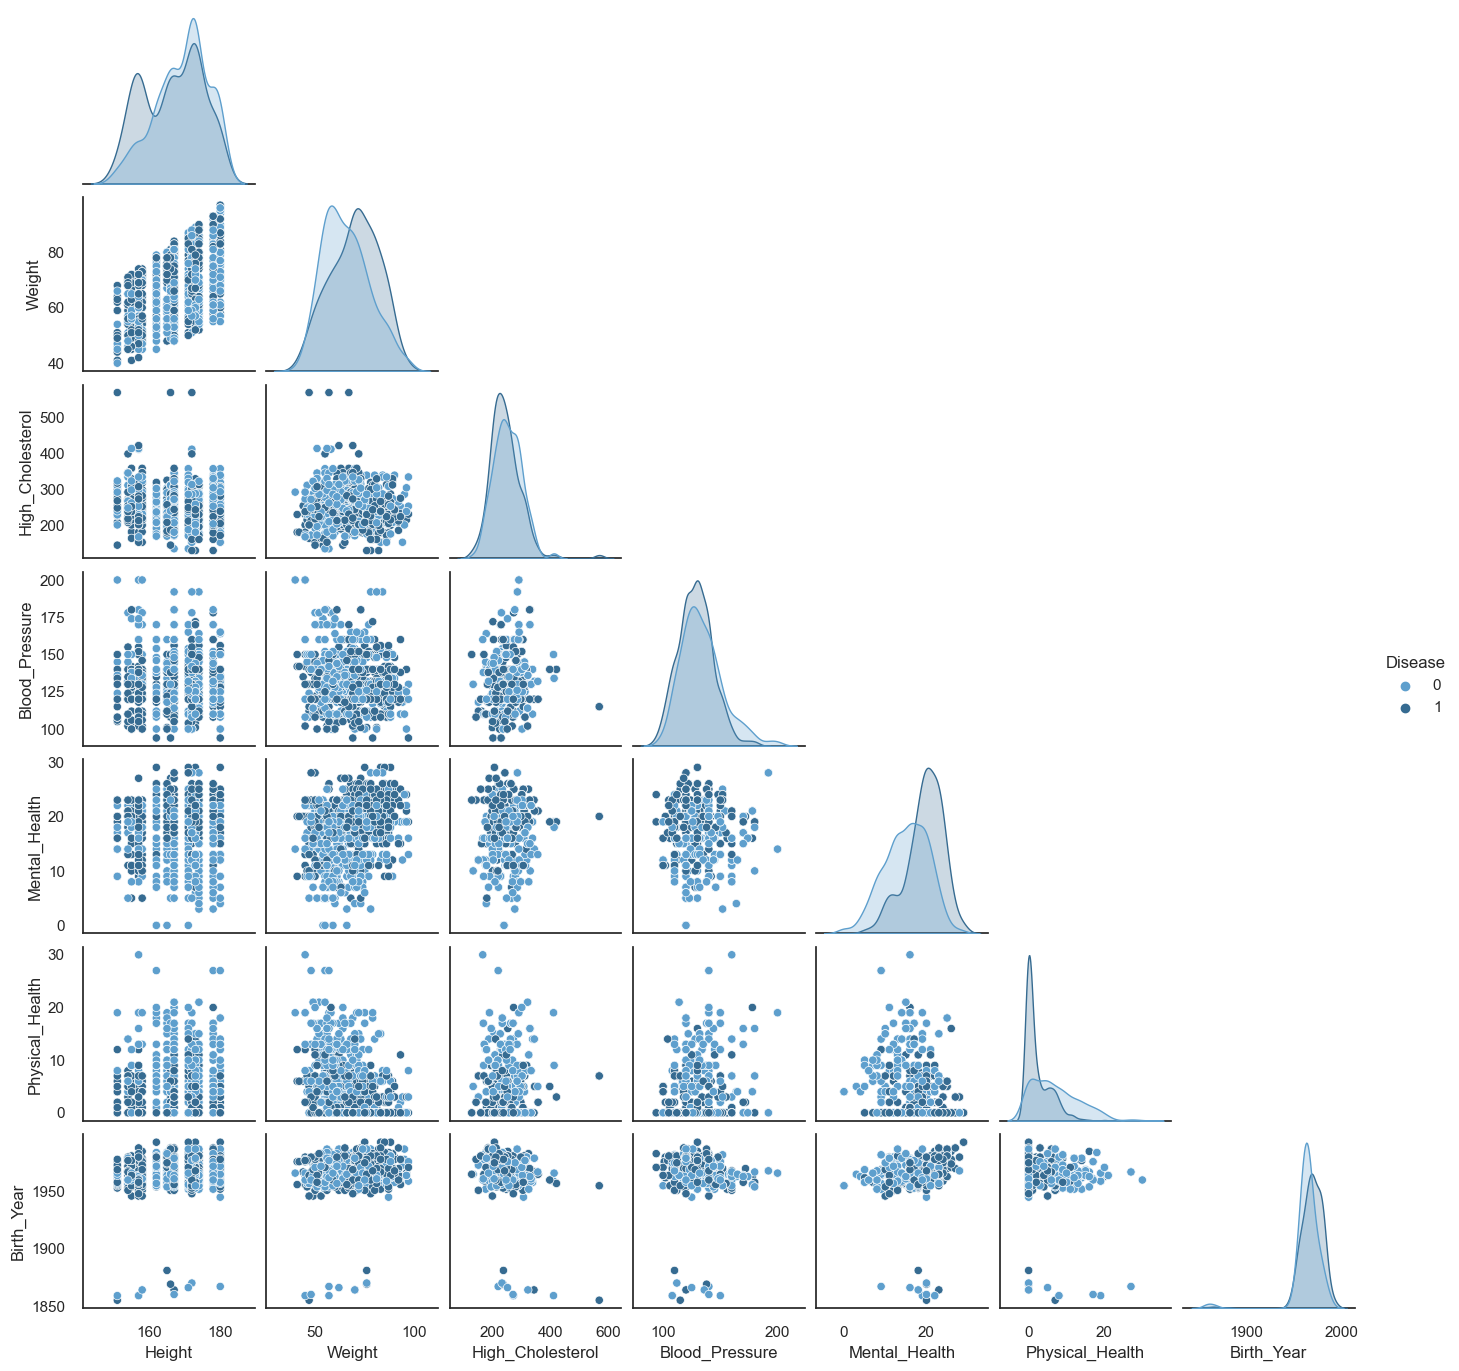

In [7]:
# Layout
plt.rcParams['font.size'] = '15'

# Plot
ax = sns.pairplot(train_data, diag_kind = 'kde', corner = True, hue = 'Disease', palette='Blues_d', height = 2)

plt.show()

__Notes:__ 

> 1 - This pair plot builds on two basic figures, the kdeplot and the scatter plot. The main-diagonal subplots (kdeplots) are univariate Kernel Distribution Estimation Plots for each attribute. This type of plot allows to estimate the probability density function of the continuous or non-parametric variables <p>
> 2 - On the other half, the scatter plots show the relationship or lack of it between two variables, i.e., the right-most plot on the last row shows the scatter plot of __Birth Year__ versus __Physical Health__ <p>
> 3 - Correlation is not assessed only by looking at a scatterplot, but looking at the pairplot above can provide some insights <p>
> 4 - It can be already concluded that Diseased People (the darkest dots, according to the legend on the right) have 
the lower __Physical Health__ values despite having the higher __Mental Health__ values. As for the rest of the features, __they don't present big discrepancies, when comparing Diseased Patients to Non-Diseased__

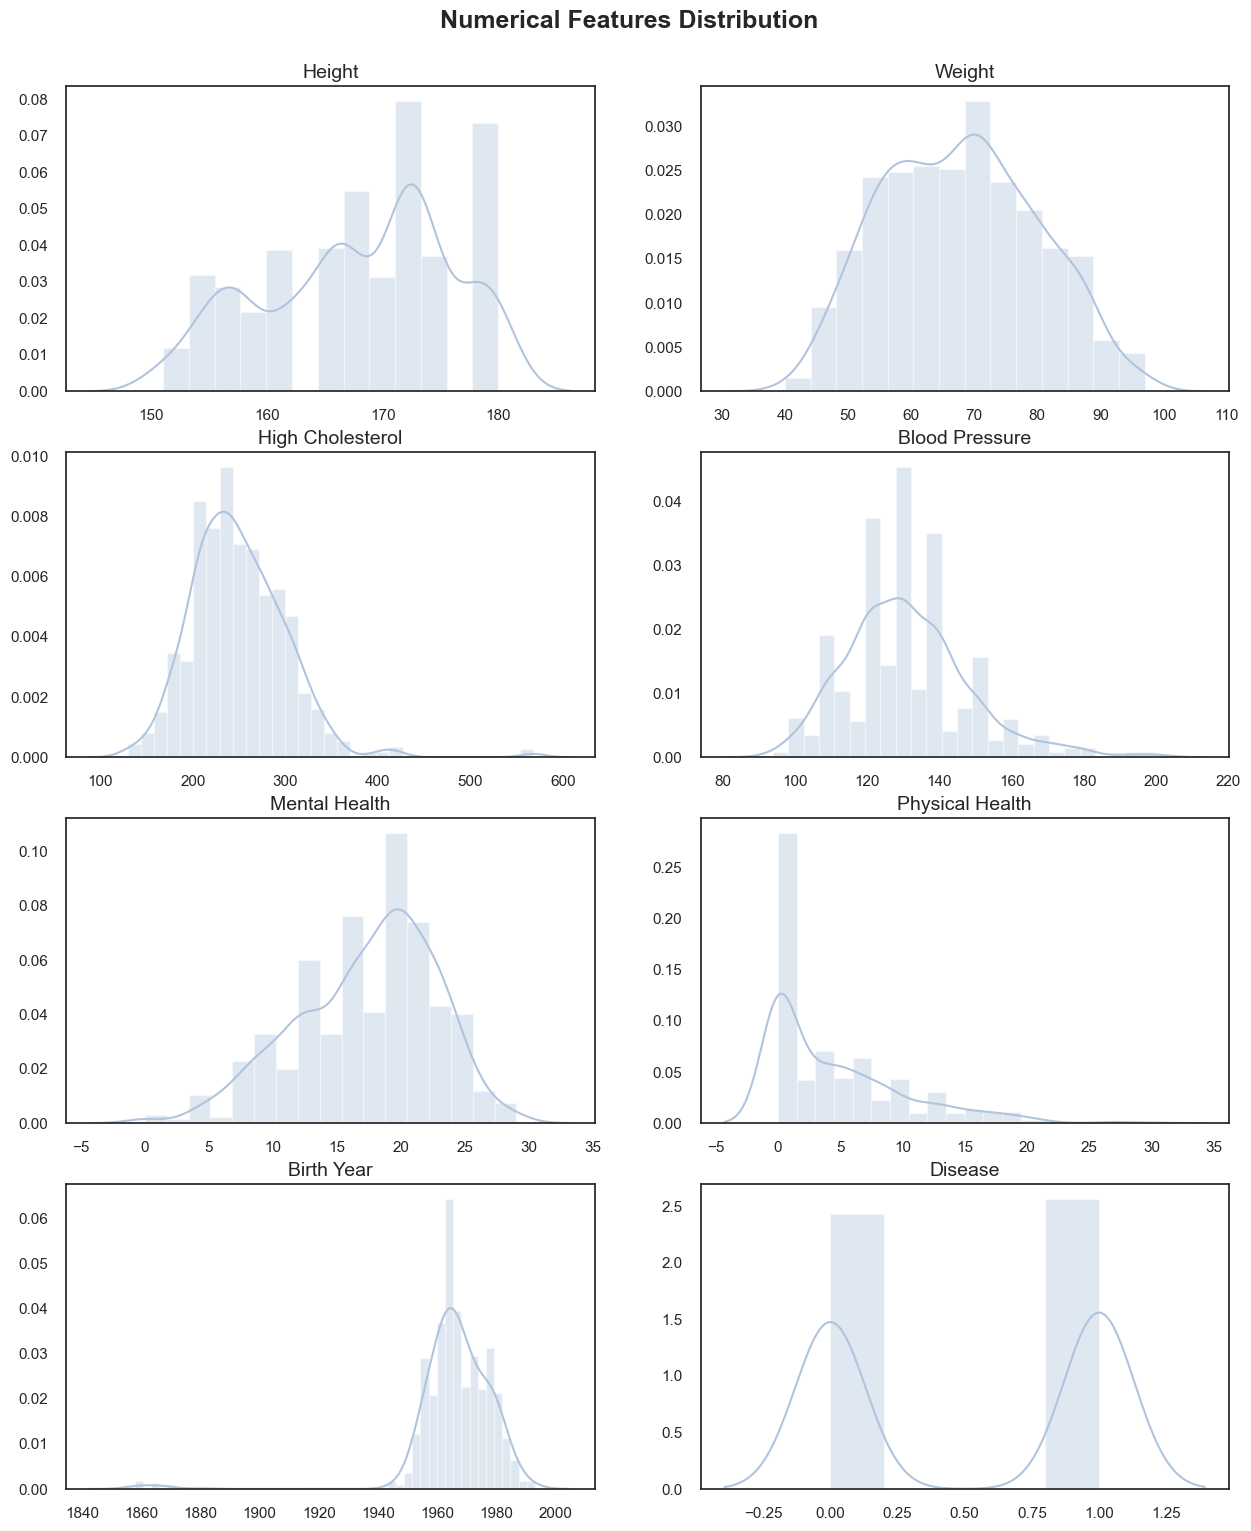

In [8]:
def dist_check(data): 
    '''
    Displays distribution of numerical data
    
    Args:
        data (pandas dataframe) - dataset to check
        
    Returns:
        matplotlib.pyplot subplots
    '''
    # Getting numerical features 
    nums = [col for col in data.select_dtypes(np.number).columns]
    # Plot
    fig, axes = plt.subplots(nrows = 4,
                             ncols = ceil(len(nums)/4),
                             figsize = (15,17), 
                             constrained_layout = True
                            )

    # Plot data
    # Iterating across axes objects and associating each histogram
    for ax, col in zip(axes.flatten(), nums):
        sns.distplot(data[col], hist=True, color = 'lightsteelblue', ax=ax)
        ax.set_title(col.replace('_', ' '), y = 1, fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Layout
    plt.suptitle('Numerical Features Distribution', fontsize = 18, fontweight = 'bold')
    plt.subplots_adjust(left = None, bottom = None, right = None, top = .935, wspace = None, hspace = None) 

    plt.show()
    
# checking distributions
dist_check(train_data)

__Notes:__ 

> 1 - __High Cholesterol__, __Blood Pressure__ and __Physical Health__ are positively skewed (possible high value outliers)<p>
> 2 - __Birth Year__ is negatively skewed (low value outliers)<p>
> 3 - __Weight__, __High Cholesterol__, __Blood Pressure__, __Mental Health__ and __Birt Year__, all follow a normal distribuiton despite __Birth Year__ being negatively skewed and __Blood Pressure__ being slightly positively skewed<p> 
> 4 - Through __Birth Year__, it's observed that the majority of the population was born between 1950 and 1980 <p>
> 5 - Through __Disease__, it's confirmed that there are slightly more Patients with the disease than without, but since the categories proportion is almost 50/50, it can be considered a balanced set <p>
> 6 - Through __High Cholesterol__, it's observed that the majority of the population indeed has high cholesterol, with most values falling within the range between 200 and 300 <p>
> 7 - Through __Blood Pressure__, it's observed that there are some high values skewing the data positively. Theoretically, low blood pressure is considered to be 90mmHg (systolical) or lower and high blood pressure is considered to be 140mmHg (systolical) or higher <p>
> 8 - __Mental and Physical Health__ values range from 0 to 30 <p>
> 9 - __Height__ is in centimeters and __Weight__ in kilograms

***
### 3.2 Qualitative Check
> * __Categorical variables with invalid or unexpected values__ <p>
> * __Categorical variables with high cardinality__ <p>
> * __Categorical variables where one level represents most of the observations (imbalanced)__ <p>

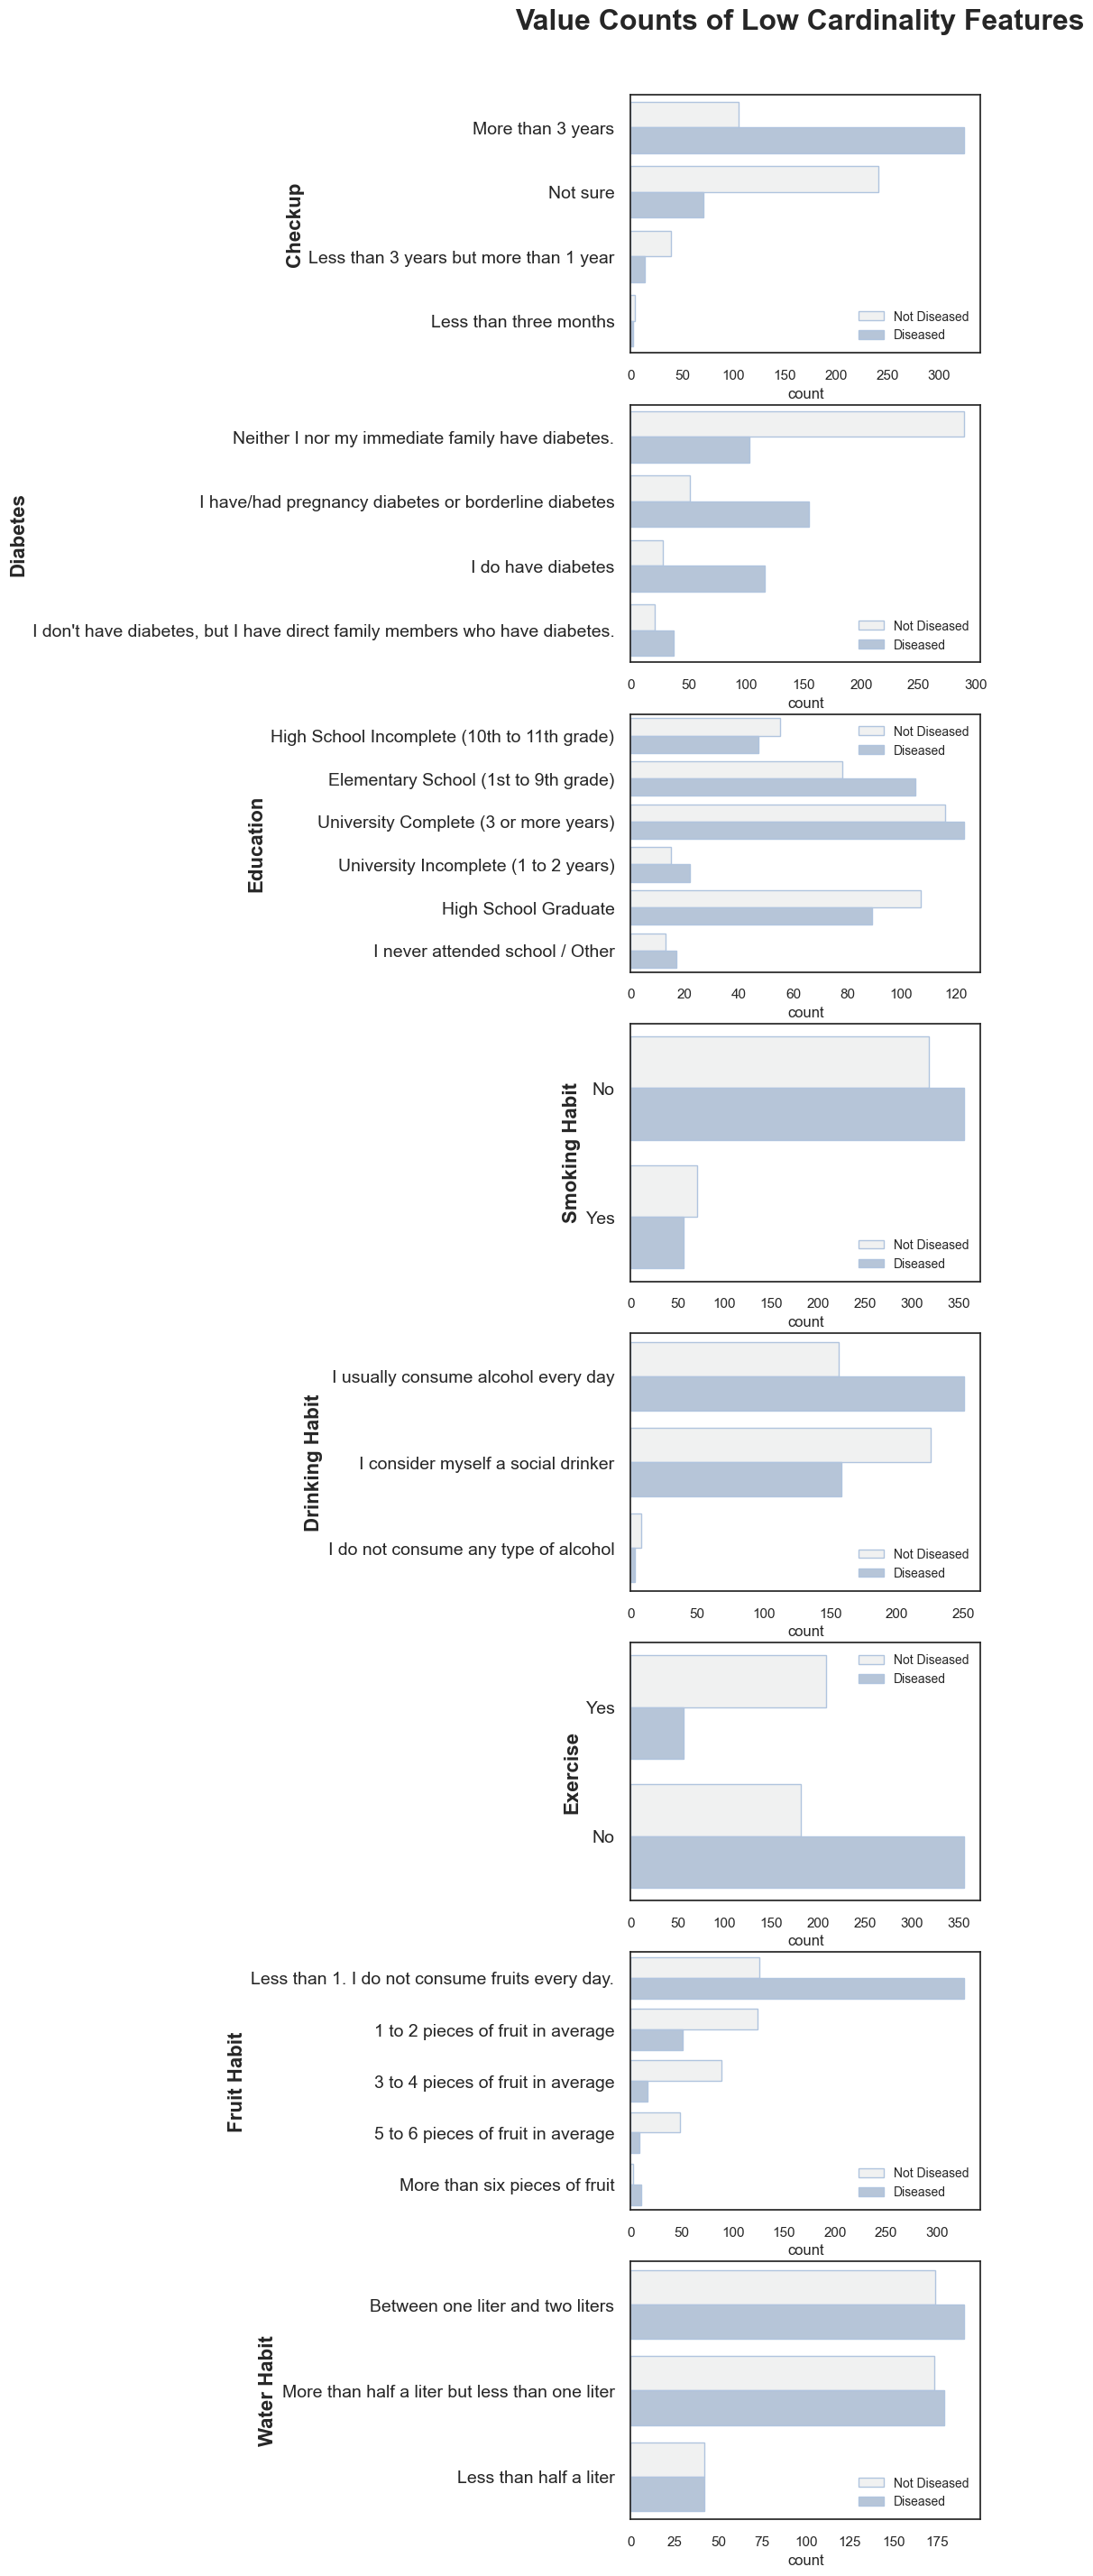

In [9]:
# Getting low cardinality features (bellow 7 different/unique categories)
low_card_cat = [col for col, rows in train_data[qualitative].items() if len(rows.value_counts()) <= 7]

# Plot
fig, ax = plt.subplots(len(low_card_cat), 1, figsize = (5, len(low_card_cat)*4)) 

for i in range(len(low_card_cat)): 
    sns.countplot(data = train_data,
                  y = train_data[low_card_cat[i]],
                  hue='Disease',
                  color='lightsteelblue',
                  edgecolor='lightsteelblue',
                  ax = ax[i])
    # Customize
    if i == 0:
        ax[i].legend(title='', loc='lower right', labels=['Not Diseased','Diseased'],  prop={'size': 10})
    else:
        ax[i].legend(title='', loc=0, labels=['Not Diseased','Diseased'],  prop={'size': 10})
    ax[i].set_ylabel(low_card_cat[i].replace('_', ' '), fontsize=16, fontweight='bold')
    ax[i].tick_params(axis='y', labelsize=14)

    
# Layout
plt.suptitle('Value Counts of Low Cardinality Features', fontsize = 23, fontweight = 'bold')  
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.95, wspace=0.4, hspace=None) 

plt.show()

__Notes:__ 
    
> 1 - Some of the habits seem to be important indicators, since it was found that __Patients who consume alcohol every day, don't exercise 3 times per week or more or don't consume fruit everyday__ have higher chances of having the disease<p>
> 2 - Also some health features apper to be important indicators, as it was found that __Patients who don't visit the doctor for a routine Checkup in more than 3 years__ have higher chances of having the disease<p>
> 3 - __Patients who got contact with Diabetes directly (by having it) or indirectly (direct family having it), seem more prone to have the disease, the creation of a dummy variable with Patients who don't have any contact at all with Diabetes (as 0) and Patients who've had any contact (direct or indirect) should be studied__ <p>
> 4 - __Education__, __Water Habit__ and __Smoking Habit__ seem to have __no particular relation with disease__

* __Value Counts of High Cardinality features__:

In [10]:
# getting high cardinality features
high_card_cat = [feat for feat in qualitative if feat not in low_card_cat]

for feat in high_card_cat:
    print(f'\033[1mFeature: {feat}\n')
    print(train_data[feat].value_counts(), '\n\n')

Feature: Name

Mr. Gary Miller           2
Mrs. Stephanie Gay        1
Mr. Roger Rudd            1
Mr. Vito Ertz             1
Mrs. Marilyn Miller       1
                         ..
Mr. Dennis Chatcho        1
Mrs. Shirley Thomas       1
Mr. Martin Paine          1
Mr. Tommy Tricomi         1
Mr. Freddie Vermillion    1
Name: Name, Length: 799, dtype: int64 


Feature: Region

East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64 




__Notes:__

> 1 - __Name__ it's an almost unique variable, having just one name common among two of the Patients (might even be a duplicate row), because of this characteristics, __it can be assumed it has no relation with disease__<p>
> 2 - __Region__ has a category on caps "LONDON" with only 5 instances while there's also a category  "London", leading to a conclusion that __these 5 observations were a typo error__<p>

In [11]:
# fixing region feature by lower casing all values
train_data['Region'] = train_data['Region'].str.lower()
test_data['Region'] = test_data['Region'].str.lower()

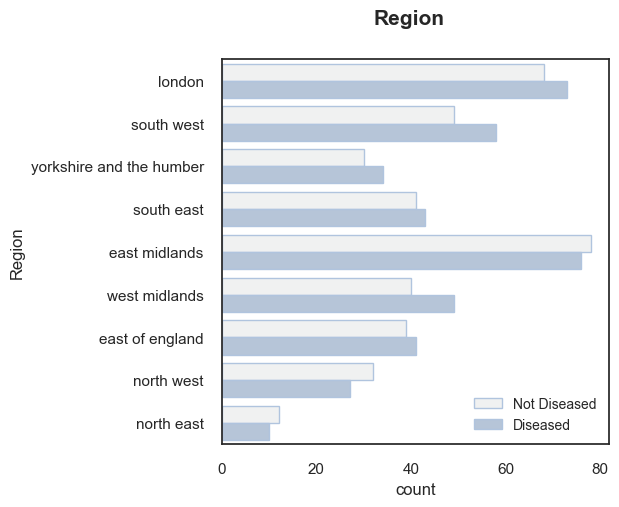

In [12]:
# Plot
plt.figure(figsize=(5,5))

sns.countplot(
                data = train_data,
                y = train_data['Region'],
                hue='Disease',
                color='lightsteelblue',
                edgecolor='lightsteelblue'
             )
# Layout
plt.suptitle('Region', fontsize = 15, fontweight = 'bold') 

# Customize
plt.legend(title='', loc='lower right', labels=['Not Diseased','Diseased'],  prop={'size': 10})

plt.show()

__Notes:__
> 1 - __Region__ seem to have __no particular relation with disease__<p>

***    
### 3.3 Redundancy
> * __Strong correlations with the target variable__ <p>
> * __Redundancy, through strong correlations between training variables__ <p>
    
The __Pearson correlation__ follows some assumptions like: <p>
>    1 - __Data variables are on an interval or ratio level of measurement__ <p>
>    2 - __Data variables follow normal distribution__ <p>
>    3 - __Data has no outliers__<p>
    
Since the data doesn't meet assumptions 2 and 3, it'll not be used<p> 
The __Spearman correlation__ follows an assumption: <p>
>    1 - __Data variables are monotonically related__ (meaning that the relationship between variables fall within the following 2 possibilities: (1) as the the value of one variable increases, so does the value of the other variable, OR, (2) as the value of one variable increases, the other variable value decreases) <p>

Because the data meet this assumption, the __Spearman correlation__ test will be one used<p>

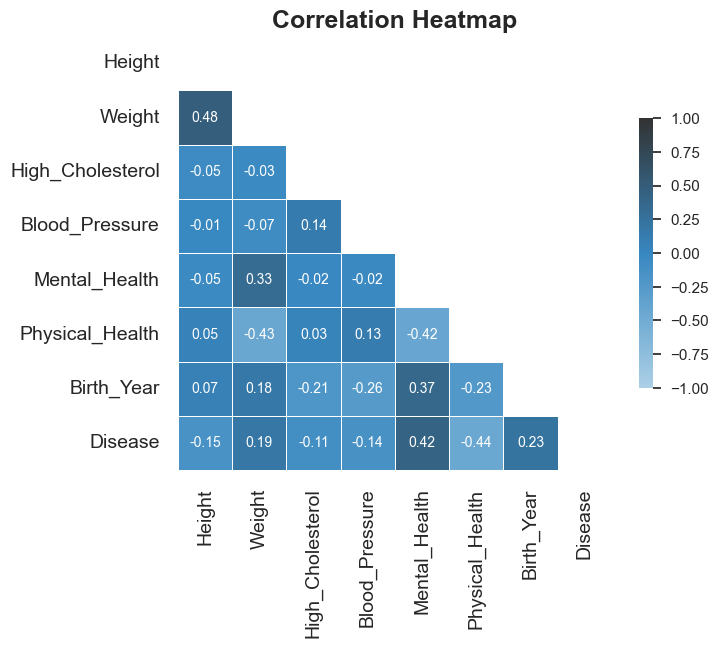

In [13]:
# Correlations analysis
# plot
cmap = sns.color_palette('Blues_d', as_cmap=True)

# Computing the correlation matrix
corr = train_data.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
plt.figure(figsize = (7, 7))


sns.heatmap(corr,
            mask = mask,
            cmap = cmap,
            vmax = 1,
            vmin = -1,
            center = 0,
            
            square = True,
            linewidths = .5,
            cbar_kws = {'shrink': .5},
            annot = True,
            fmt = '.2f',
            annot_kws={'size':10}
           )

#customize
plt.title('Correlation Heatmap',fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

__Notes:__

> 1 - It seems that the values are __not strongly related__ among each other, which means __there are not redundant variables at this point__<p>
> 2 - __Weight__ and __Height__ have a __moderate positive relationship__ (meaning when the value of one increases, so does the value of the other variable)<p>
> 3 - __Disease__ and __Mental Health__ have a __moderate positive relationship__<p>    

***    
### 3.4 Duplicates

In [14]:
# Checking for any duplicates 
train_duplicate = train_data.reset_index().duplicated().sum()
test_duplicate = test_data.reset_index().duplicated().sum()

print('Number of duplicates in train data:', train_duplicate, '\nNumber of duplicates in test data:', test_duplicate)

Number of duplicates in train data: 0 
Number of duplicates in test data: 0


__Notes:__ 
> 1 - __The repeated name isn't a duplicated Patient__

***    
### 3.5 Outliers

> ### 3.5.1 Z-Score Approach

__Z-score is a statistical measure that reveals how far is a data point from the rest of the dataset__. In other words, Z-score shows how many standard deviations away a given observation is from the mean, denoted by __z__ and is calculated using the following formula: 
<p><p><p>$$\Large{{z}} = \frac{{(x-\overline{x})}}{s}$$
    
Z-score assumes the distribution of the data is normal, therefore only features with this characteristic will be analyzed with this test
    
There are some rules for the treshold used to consider a value an outlier, in this case, it'll the treshold will be 3.5 according to __the rule of thumb__ (which is to use 2, 2.5, 3 or 3.5 as threshold), meaning that __values that are 3.5 standard deviations far from the mean (extreme outliers), are considered outliers by this test__

In [15]:
# features with normal distribution
normal = ['Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Birth_Year']

# Array with Z-scores from all observations of numerical features
Z = np.abs(stats.zscore(train_data[normal]))

# Defining Z-score threshold accordind to the rule of thumb
threshold = 3.5 # the rule of thumb implies the use of 2, 2.5, 3 or 3.5 as threshold

# 2 arrays with the outliers respective row and column indices
positions = np.where(Z >= threshold) # gets values that are 3.5 standard deviation far from the mean
print('\033[1mOutlier Position Arrays:\033[0m\n\nRows:\n', positions[0], '\n\nColumns:\n', positions[1], '\n\n')

# High Z-score values count
columns = positions[1]

for col in np.unique(columns): 
    # getting column name & replacing underscore with space
    col_name = train_data[normal].columns[col].replace('_', ' ') 
    occurrences = np.count_nonzero(columns == col) # getting number of outliers per column
    print(f'The \033[1m{col_name}\033[0m feature has {occurrences} observations with a Z-score',
          f'higher or equal to {threshold}\n') 

Outlier Position Arrays:

Rows:
 [ 18  22  35  61  93 198 312 312 493 503 566 585 593 617 640 648 705 710
 729 761 797] 

Columns:
 [4 1 2 4 4 4 1 4 4 2 4 2 4 2 4 4 4 2 1 2 4] 


The High Cholesterol feature has 3 observations with a Z-score higher or equal to 3.5

The Blood Pressure feature has 6 observations with a Z-score higher or equal to 3.5

The Birth Year feature has 12 observations with a Z-score higher or equal to 3.5



### Z-Score Outlier Values

In [16]:
def check_zscore_outliers(data, col):
    '''Checks values that Z-score test consider as outliers
    
    Args: 
        data (pandas.core.frame.DataFrame) : set of data 
        col (pandas.core.series.Series) : column of the data to check outliers
        
    Returns: 
        Print with outliers and respective index
    '''
    col_name = col.replace('_', ' ') # gets column name and replaces underscore with space
    tmp = data[col].reset_index() # reseting index because Z-score returns row position array with zero-based indexing
    
    # Z-scores from all observations in numerical features
    Z = np.abs(stats.zscore(tmp.drop(tmp.columns[0], axis=1))) # dropping Index column
    threshold = 3.5 # setting threshold according to thumb rule
    positions = np.where(Z >= threshold) # positions of identified outliers

    # Checking column range vs. outliers
    mini = data[col].min() 
    maxi = data[col].max() 
    print(f'The {col_name} feature ranges from {mini} to {maxi}\n\nOutlier values:\n')
    for row in positions[0]:
        print(f'Value from row {row}: ', tmp[col][row].round(2))
        
for col in np.unique(columns): 
    check_zscore_outliers(train_data, train_data[normal].columns[col])
    print('\n')

print('If we eliminate outliers with the Z-Score Method it\'ll remain\033[1m',
      np.round((1-len(set(positions[0]))/len(train_data))*100,3),'%\033[0m of the initial data')

The High Cholesterol feature ranges from 130 to 568

Outlier values:

Value from row 22:  568
Value from row 312:  568
Value from row 729:  568


The Blood Pressure feature ranges from 94 to 200

Outlier values:

Value from row 35:  200
Value from row 503:  200
Value from row 585:  192
Value from row 617:  192
Value from row 710:  192
Value from row 761:  200


The Birth Year feature ranges from 1855 to 1993

Outlier values:

Value from row 18:  1859
Value from row 61:  1859
Value from row 93:  1864
Value from row 198:  1881
Value from row 312:  1855
Value from row 493:  1859
Value from row 566:  1867
Value from row 593:  1869
Value from row 640:  1870
Value from row 648:  1866
Value from row 705:  1864
Value from row 797:  1860


If we eliminate outliers with the Z-Score Method it'll remain 97.5 % of the initial data


> ### 3.5.1 IQR Approach

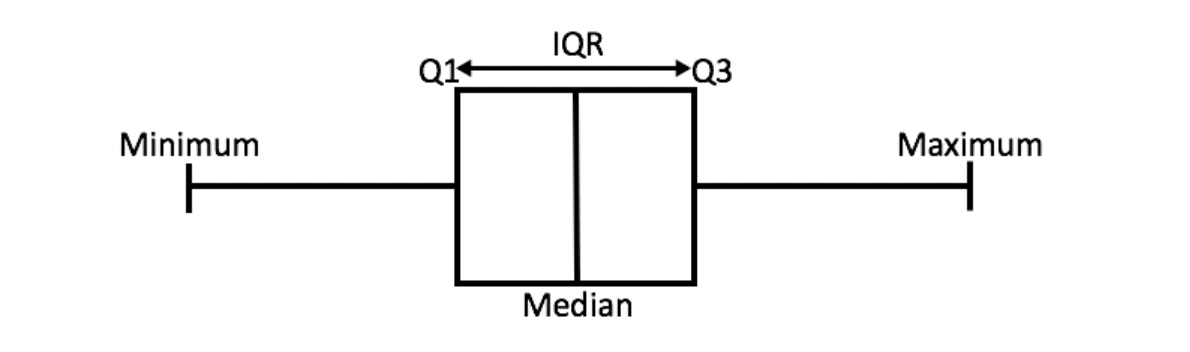

A boxplot tells, more or less, about the distribution of the data. __It gives a sense of how on how much the data is spread about, what’s its range and about its skewness__ <p><p>
> * A boxplot shows:
    >> * __The minimum value__ <p>
    >> * __The first quartile (Q1), i.e., to say 25% of the data lies between minimum and Q1__ <p>
    >> * __The median, also called Q2 of the data (resulting from the fact that the data is ordered)__ <p>
    >> * __The Q3, i.e., to say 75% of the data lies between minimum and Q3__ <p>
    >> * __The maximum value__ 
The __difference between Q3 and Q1 is called the Inter-Quartile Range__ or IQR <p><p>
    
To detect the outliers using this method, a new range is defined (decision range), where __any data point lying outside this range is considered as an outlier and is accordingly dealt with__. The range is as given below: <p>
> * __Lower Bound: (Q1 - criterion * IQR)__<p>
> * __Upper Bound: (Q3 + criterion * IQR)__<p>
        
So any data point lower than the Lower Bound or higher than the Upper Bound __is considered as an outlier by this method__

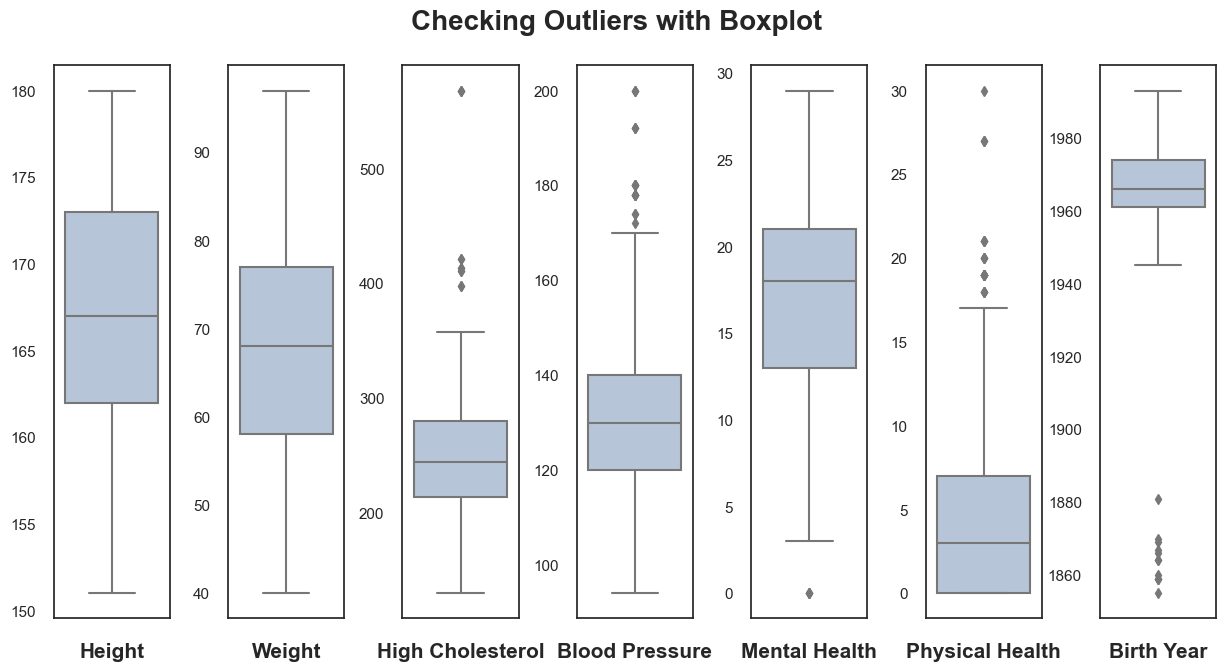

In [17]:
# Getting numerical data into a dataframe
tmp = train_data[quantitative].copy()

# Getting high variance numerical data
for col, rows in tmp.items(): 
    if rows.value_counts().shape[0] == 2:
        del tmp[col]
        
# Plot
fig, ax = plt.subplots(nrows = 1, ncols = len(quantitative)-1,
                       figsize = (15, 7),
                       #constrained_layout=True
                      ) 
        
for row in range(tmp.shape[1]):
    sns.boxplot(y = tmp.iloc[:,row], color = 'lightsteelblue', ax = ax[row])
    ax[row].set_xlabel(tmp.columns[row].replace('_',' '), fontsize = 15, fontweight = 'bold')
    ax[row].set_ylabel('')
    
# Layout
plt.suptitle('Checking Outliers with Boxplot', fontsize = 20, fontweight = 'bold')
plt.subplots_adjust(left=None, bottom=None, right=None, top=.90, wspace=.5, hspace=None) 
        
plt.show()

__Notes:__
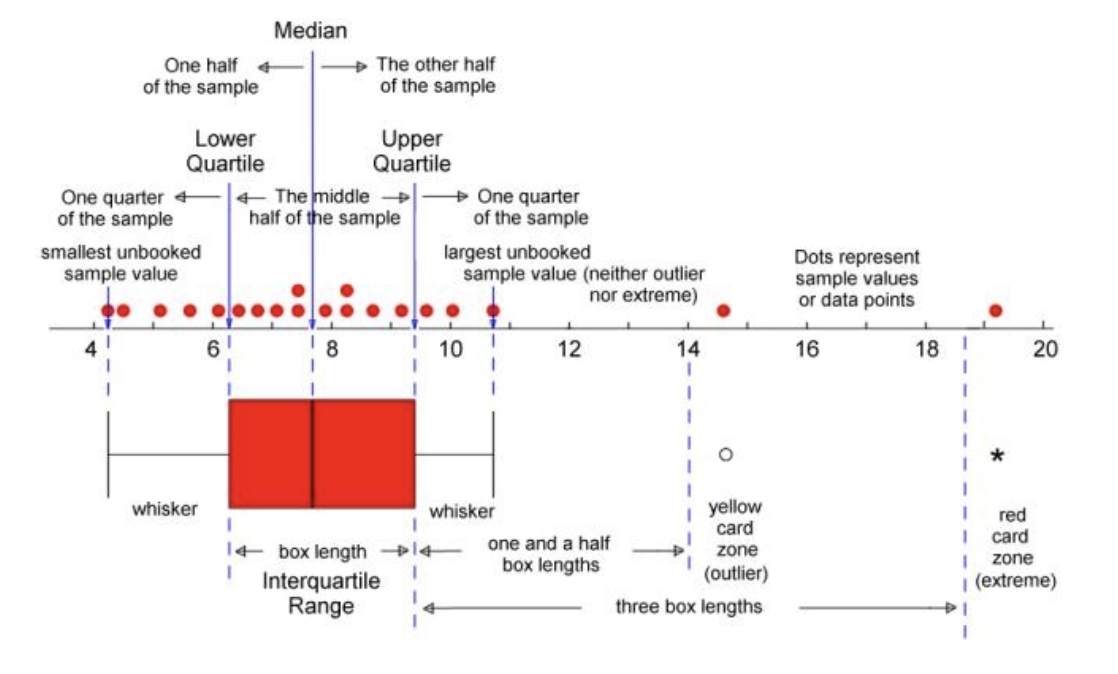
> * The python boxplot uses a criterion of 1.5, meaning that, __values 1.5 times bellow than Q1 and 1.5 times above Q3 are consider outliers__ <p>
> * Because the data is sensitive, only extreme values with IQR test will be considered for this test __by using a criterion of 3__ <p>
> * The 3(IQR) criterion tells us that any observation that falls outside the decision range is considered an extreme outlier https://bolt.mph.ufl.edu/6050-6052/unit-1/one-quantitative-variable-introduction/understanding-outliers/#extreme

In [36]:
def check_IQR_outliers(data, criterion, mode='data'):
    '''
    Detects outliers by generating a decision range based on a criterion (threshold) 
    and locating values that don't fall within this range. 
    Can return the dataframe without the outliers or the percentage of remaining data
    after outlier removal or the values considered as outliers for each column by 
    changing the parameter 'mode' (data as default)
    
    Args: 
        data (pandas.core.frame.DataFrame) : set of data 
        col (pandas.core.series.Series) : column of the data to check outliers
        criterion (int) : IQR multiplier, the higher, the larger the decision range
        mode (str): 'data' to get dataframe without outliers 'perc' to check percentage
                     or 'values' to check values
        
    Returns:
        Dataframe without 
        Print with percentage of remaining data after removing outliers or
        index and values that fall outside the decision range (outliers)
    '''
    if mode == 'data': 
        Q1 = data.quantile(.25) # value of first quartile
        Q3 = data.quantile(.75) # value of third quartile
        IQR = Q3 - Q1 # interquartile range
        lower_lim = Q1 - criterion * IQR # setting min limit
        upper_lim = Q3 + criterion * IQR # setting max limit
        
        outliers = []
        for col in data.select_dtypes(np.number).columns:
            llim = lower_lim[col]
            ulim = upper_lim[col]
            outliers.append(data[col].between(llim, ulim, inclusive='both'))
            
        # np.all() tests whether all array elements along a given axis evaluate to True
        outliers = data[np.all(outliers, 0)]
        
        return outliers
        
    elif mode == 'perc':
        print('\n\033[1mPercentage of remaining data after outlier removal with IQR method:\033[0m\n')
        Q1 = data.quantile(.25) # value of first quartile
        Q3 = data.quantile(.75) # value of third quartile
        IQR = Q3 - Q1 # interquartile range
        lower_lim = Q1 - criterion * IQR # setting min limit
        upper_lim = Q3 + criterion * IQR # setting max limit
        
        outliers = []
        for col in data.select_dtypes(np.number).columns:
            #outliers.append(data[col].between(lower_lim[col], upper_lim[col], inclusive='both'))
            llim = lower_lim[col]
            ulim = upper_lim[col]
            outliers.append(data[col].between(llim, ulim, inclusive='both'))
            
        # np.all() tests whether all array elements along a given axis evaluate to True
        outliers = data[np.all(outliers, axis=0)]
        
        print(f'\033[1m{round(len(outliers)/len(data)*100,3)} %\033[0m of remaining data', 
              'after IQR method outlier removal, when criterion is', criterion)
    
    else:
        print('\n\n\033[1mOutlier Values:\033[0m\n')
        for col in data.select_dtypes(np.number).columns:
            Q1 = data[col].quantile(.25) # value of first quartile
            Q3 = data[col].quantile(.75) # value of third quartile
            IQR = Q3 - Q1 # interquartile range
            lower_lim = Q1 - criterion * IQR # setting min limit
            upper_lim = Q3 + criterion * IQR # setting max limit
            outliers = data.loc[(data[col] > upper_lim) | (data[col] < lower_lim)][col]
            print(f'Outlier values in \033[1m{col}\033[0m:\n')
            for idx, val in outliers.items():
                print(f'Value from Client {idx}: \033[1m', round(val,2),'\033[0m\n')

# checking outlier values
check_IQR_outliers(data=train_data, criterion=3, mode='value')


# checking percentage of remaining data
check_IQR_outliers(data=train_data, criterion=3, mode='perc')



Outlier Values:

Outlier values in Height:

Outlier values in Weight:

Outlier values in High_Cholesterol:

Outlier values in Blood_Pressure:

Outlier values in Mental_Health:

Outlier values in Physical_Health:

Value from Client 1069:  30 

Outlier values in Birth_Year:

Outlier values in Disease:


Percentage of remaining data after outlier removal with IQR method:

99.872 % of remaining data after IQR method outlier removal, when criterion is 3


***
### 3.5.3 - Manual Approach

With manual outlier removing, __several outliers can be excluded with precision__, since is the user who define manually the conditions to determine which values are outliers, considering the ones who fall under these conditions bellow (__the conditions were defined based on the extreme values observed in the summary statistics and distribution plots, and other Outlier Detection Methods__)<p>
> * __Conditions:__ <p> 
>> * As mentioned previously __Birth Year__ minimum value must 1907, since the oldest living person was born in that year and __this is a recent problem, with recent data, meaning all Patients need to be alive__ <p>
>> * Values of __High Cholesterol__ above 500 seem to extremely high and were detected by the two previous methods, therefore, they'll be considered as ouliers<p> 
<img src="https://i.insider.com/5f19dd2ef0f41940574e24a5?width=1000&format=jpeg&auto=webp" width="500"/><p>
>> * As for __Blood Pressure__ values above 180 mean the Patient should be having a Hipertensive Crysis and were also detected by the Z-Score test, therefore, they'll be considered as ouliers<p>
<img src="https://i0.wp.com/images-prod.healthline.com/hlcmsresource/images/topic_centers/2018-10/9842-blood-pressure-readings-explained-1296x1645-body.20181002181105178.jpg?w=1155&h=3454" width="500" />

In [19]:
# Outlier Conditions
manual_outliers = train_data.loc[
            (train_data['Birth_Year'] < 1907) |
            (train_data['High_Cholesterol'] > 500) |
            (train_data['Blood_Pressure'] > 180)
            ]

# saving dataset without outliers to check results
tmp = train_data.drop(manual_outliers.index)

print('After excluding the outliers manually,',
      f'the dataset will remain with \033[1m{np.round((1-len(manual_outliers)/len(train_data))*100, 3)}',
      '%\033[0m of its original Customers')


After excluding the outliers manually, the dataset will remain with 97.5 % of its original Customers


In [20]:
### TALVEZ NÃO DROPPE BLOOD PRESSURE ALTA (VALIDAR)

*** 
### Outliers Conclusion 

Percentages of Data kept after outlier removal for each test: <p>
> * __Z-Score:__ 97.5 %
> * __IQR:__ 98.1 %
> * __Manual:__ 97.5 %
    
The __IQR__ is the one who keeps more data but doesn't consider the values above 180 in __Blood Pressure__ as ouliers, while the other two tests consider. Also, considers the maximum __Physical Health__ (30) to be an outlier, but that's impossible since it's within the predefined range of the feature [0,30], therefore this will not be method used. The __Z-Score__ test detected the same outliers as the __Manual__ test. Therefore, one of this two methods will be applied to remove outliers
    
### Distribution Plots After Outlier Removal

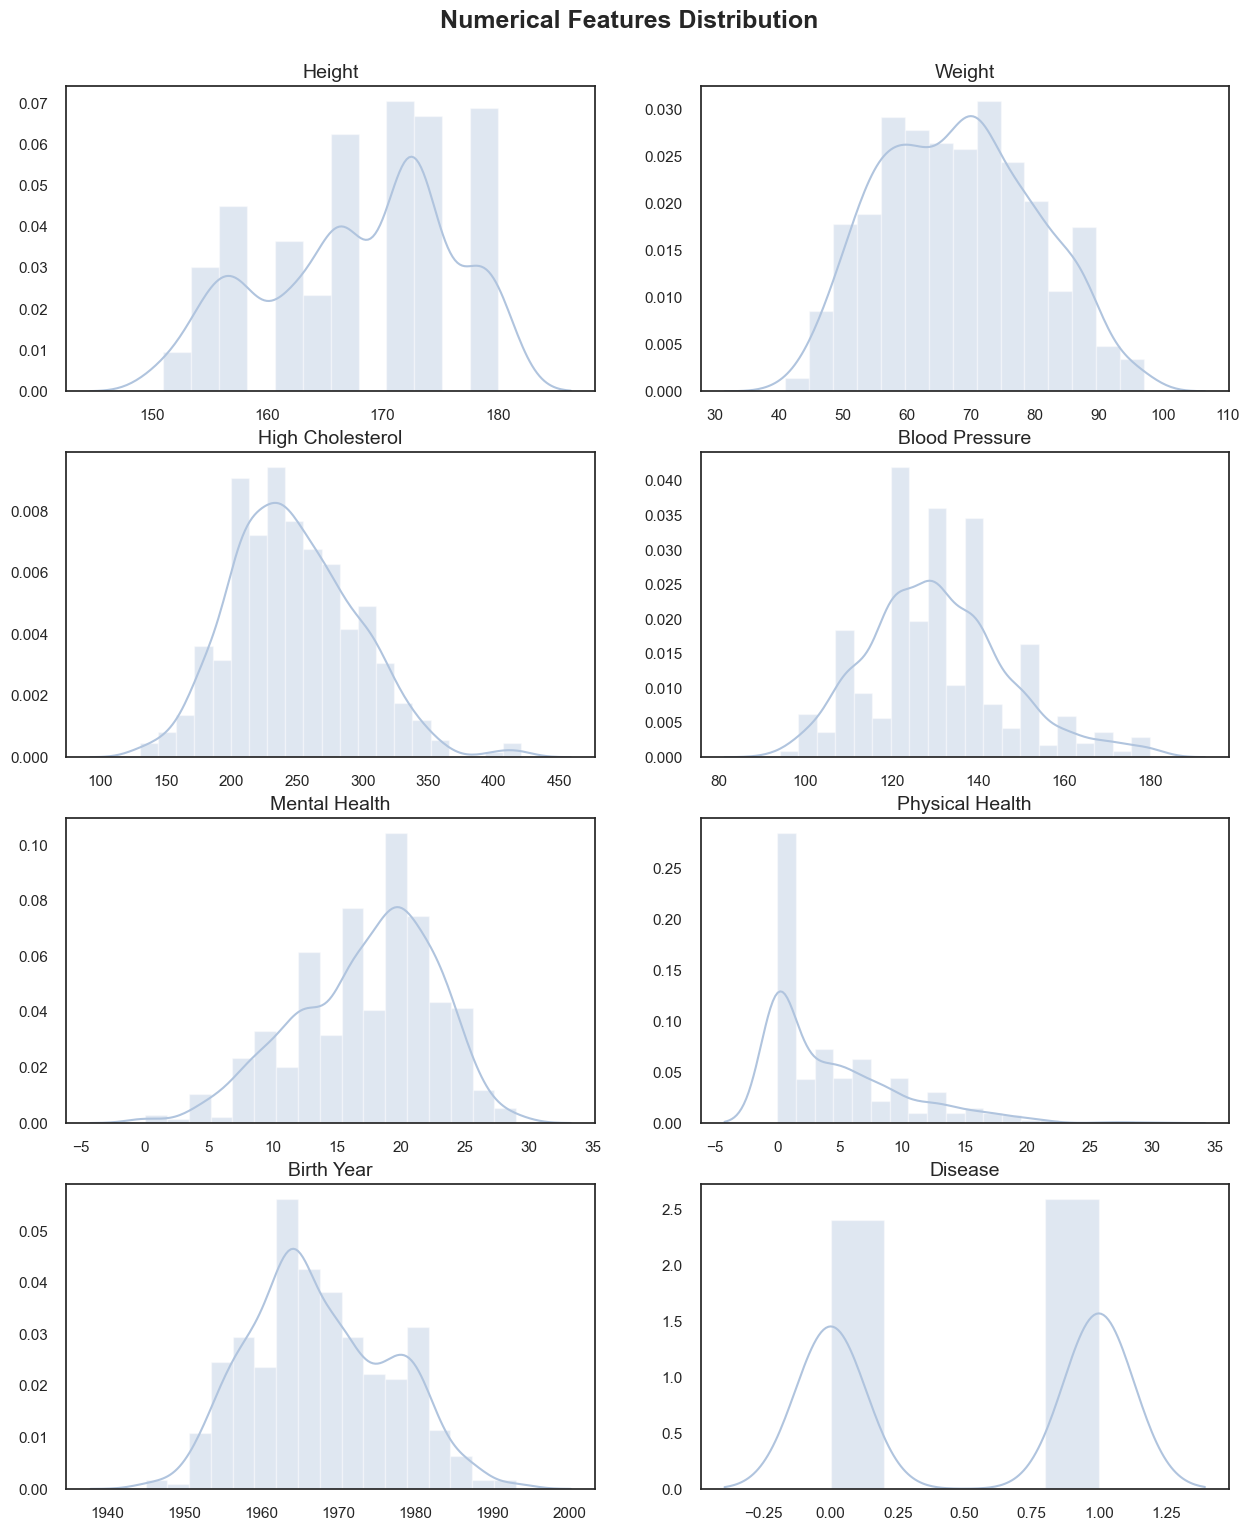

In [21]:
# removing outliers
train_data.drop(manual_outliers.index, inplace = True)

# checking distributions
dist_check(train_data)

***
### 3.4 Data Split
__Data splitting is when data is divided into two or more subsets__. Typically, with a __two-part split__, one part is used to evaluate or test the data and the other to train the model. <p> 
As mentioned previously in the introduction __"The training data will be the one used to build the machine learning models"__, therefore, only the training data will be splitted (__into two new sets, Training and Test__).<p> 
> * __Why split the data now before finishing Data Preparation?__ <p>
>> *   Test data is data from the future, meaning it's __unseen data to the models__, therefore, __all data imputation involving techniques (like mean, median, mode, z-score standarization etc...) have to be done after train-test split__, otherwise might lead into a __Data Leakage issue__ (when the __training data contains information about the target__, but similar data __will not be available when the model is used for prediction__. This lead to high performance on the training set (and possibly even the test data), but the model will perform poorly in production)
    
The split will leave 20% in the hold out sample, __meaning 80% of the Train Data will be used to train models__, also the data will be __randomly shuffled__ before being split and __stratified__, meaning it'll retain the same proportion of classes on train and test sets that are found in the original dataset

In [22]:
# splitting target from other variables
X = train_data.drop('Disease',axis=1)
y = train_data['Disease']

# Setting random states seed
seed = 99

# Splitrin the data, leaving 20% in the hold out sample
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    random_state = seed,
                                                    shuffle = True,
                                                    stratify = y,
                                                    test_size = .2,
                                                   )

***
### 3.5 Missing Values

In [23]:
# replacing strange characters for missing values
strange_values = ['!', '$','%','?','*','+','_','@','€',' ','{']

X_train.replace(strange_values, np.nan, inplace=True)
X_test.replace(strange_values, np.nan, inplace=True)

In [24]:
# Missing values reporter function
def missing_value_reporter(data, threshold=None):
    '''
    Returns pandas dataframe with feature's missing values count in absolute and relative frequency
    after a threshold is parsed (max % of column missing values), so it'll tell if the features are 
    above or bellow the desired missing threshold limit (True for above or False for bellow).
    
    Args:
        data (pandas.dataframe)- input for data
        threshold (float) - input for threshold variable from 0 to 1 
                            if the threshold is not provided, it defaults to None
    Returns: 
        pandas.dataframe
        
    '''
    na_count = data.isna().sum() 
    na_count = na_count[na_count > 0]
    na_abs_frq = na_count.values
    na_rel_frq = round(na_count/len(data),2)
    missings = pd.DataFrame({'Feature': na_count.index, 'Nº of missings': na_abs_frq, '% of missings': na_rel_frq})
    missings = missings.sort_values(by = 'Nº of missings', ascending = False)
    
    if threshold:
        missings['Above threshold'] = [True if x > threshold else False for x in missings['% of missings']]
        
    return missings

# threshold on 5%
print('Missing Values in Train Data:')
display(missing_value_reporter(data = X_train, threshold = .05))
print('\nMissing Values in Test Data:')
display(missing_value_reporter(data = X_test, threshold = .05))

Missing Values in Train Data:


,Feature,Nº of missings,% of missings,Above threshold
Education,Education,10,0.02,False



Missing Values in Test Data:


,Feature,Nº of missings,% of missings,Above threshold
Education,Education,2,0.01,False


__Notes:__ 

> 1 - To prevent more data loss, it'll be used the __Education__ mode of the Train dataset to fill the missing values

In [25]:
# filling missing values with mode on train and test
X_train.fillna(X_train['Education'].mode()[0], inplace=True)
X_test.fillna(X_train['Education'].mode()[0], inplace=True) 

print('Number of remaining missing values in Train Data after imputation:', X_train.isna().sum().sum(),
     '\nNumber of remaining missing values in Test Data after imputation:', X_test.isna().sum().sum())

Number of remaining missing values in Train Data after imputation: 0 
Number of remaining missing values in Test Data after imputation: 0


***
## <font color='SeaGreen'>4. Data Pre-processing </font>
__Data Pre-processing__ refers to manipulation or dropping of data __before it's used in order to ensure or enhance performance__, this phase will consist on: <p>
> *  __Feature Engineering__ <p>
>> 1. __Feature Creation & Study__ <p>
>> 2. __Feature Selection__ <p>
>> 3. __Categorical Features to Numerical__ <p>
> * __Standardization Study__
***
    
### 4.1 Feature Engineering
> ### 4.1.1 Feature Creation
It'll be created the following columns: <p> 
>> 1 - __Age__ - Increases __Birth Year__ readability <p>
>> 2 - __BMI__ - Body Mass Index is a __person's weight in kilograms (or pounds)__ divided by __the square of height in meters__ (in the data Height is in cm and Weight is in kilograms) <p> 
>> 3 - __Diabetes Contact__ - As mention previously, it'll be created a __binary variable that'll assume the value of 1 if Patients had any type of contact with Diabetes, could be direct (by having it) or indirect (direct family having it) and assume the value of 0 otherwise__ (no contact at all with Diabetes <p>
    
For numerical features the Feature Creation, there will be __redundancy__ among the newly variables and the ones that generated them, so in order to select the features that'll proceed to the modelling it'll be used the __Spearman correlation__ test on the train data (target will be merged to train data on a new python variable just for the sake of this test). __The variable with higher correlation with the target will stay, while others that migh be highly correlated with this feature will be dropped__. The decision made with train data will be also applied to test set

In [26]:
# Age column (increases readability)
X_train['Age'] = datetime.now().year - X_train['Birth_Year']
X_test['Age'] = datetime.now().year - X_test['Birth_Year']
test_data['Age'] = datetime.now().year - test_data['Birth_Year']

# Body mass index column
X_train['BMI'] = np.round(X_train['Weight'] / (X_train['Height'] / 100)**2, 3)
X_test['BMI'] = np.round(X_test['Weight'] / (X_test['Height'] / 100)**2, 3)
test_data['BMI'] = np.round(test_data['Weight'] / (test_data['Height'] / 100)**2, 3)

# Diabetes Contact column
# "Neither I nor my immediate family have diabetes." is the only case where there's no contact, also the most common
no_contact = 'Neither I nor my immediate family have diabetes.'
X_train['Diabetes_Contact'] = X_train['Diabetes'].apply(lambda x: 0 if x == no_contact else 1)
X_test['Diabetes_Contact'] = X_test['Diabetes'].apply(lambda x: 0 if x == no_contact else 1)
test_data['Diabetes_Contact'] = test_data['Diabetes'].apply(lambda x: 0 if x == no_contact else 1)

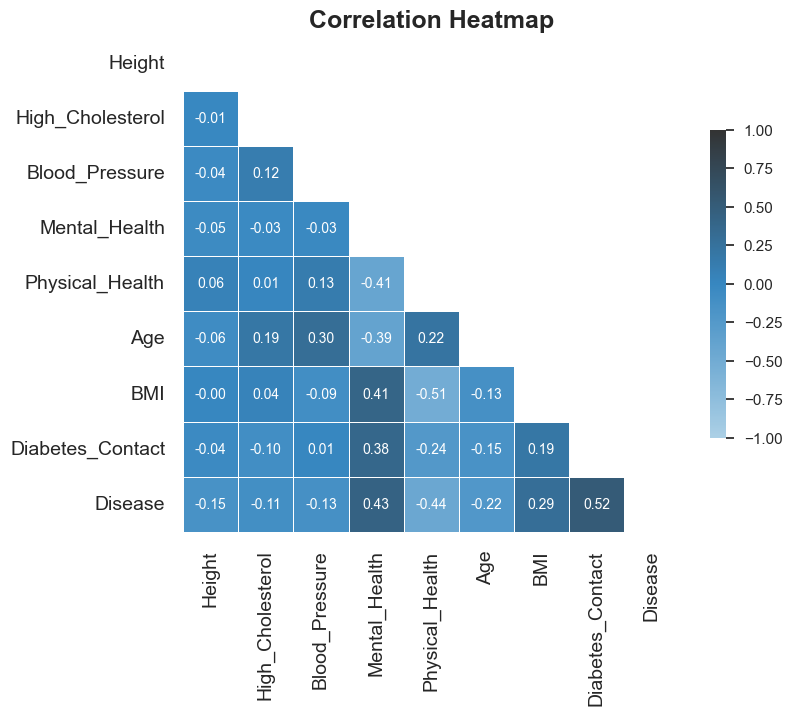

In [117]:
# Correlations analysis
# getting target again for visualization purposes
tmp = X_train.reset_index().merge(y_train.reset_index(), on='PatientID', how='left').set_index('PatientID')
# plot
cmap = sns.color_palette('Blues_d', as_cmap=True)

# Computing the correlation matrix
corr = tmp.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
plt.figure(figsize = (8, 8))


sns.heatmap(corr,
            mask = mask,
            cmap = cmap,
            vmax = 1,
            vmin = -1,
            center = 0,
            
            square = True,
            linewidths = .5,
            cbar_kws = {'shrink': .5},
            annot = True,
            fmt = '.2f',
            annot_kws={'size':10}
           )

#customize
plt.title('Correlation Heatmap',fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

__Notes:__ 

> 1 - __Diabetes Contact__ is now the highest correlation coefficient with the target, __Disease__ <p>
> 2 - __BMI__ is slightly more correlated with the target than __Weight__, while having an strong relationship between them (since __Weight__ is used to calculate __BMI__), so __Weight__ will be dropped <p>
> 3 - __Age__ and __Birth Year__ are __perfectly collinear__ (their correlation coefficient is +/- 1.0) and __both have the same relationship strenght with the target__, just different directions. For better readability of values __Age__ will stay and __Birt Year__ will be dropped

In [28]:
# Dropping redundant features
X_train.drop(['Weight', 'Birth_Year'], axis=1, inplace=True)
X_test.drop(['Weight', 'Birth_Year'], axis=1, inplace=True)
test_data.drop(['Weight', 'Birth_Year'], axis=1, inplace=True)

***
> ### 4.1.2 Feature Selection

Feature selection process is __one of the main components of a feature engineering process__. This is how a predictive model is developed by reducing the number of input variables. <p>
Feature selection techniques are employed to __reduce the number of input variables by eliminating redundant or irrelevant features__. It then narrows the set of features to those most relevant to the machine learning model. The feature selection objective in machine learning is to __indentify the most helpful group of variables that can be used to build useful models of the phenomena being studied__.<p>
> * In the machine learning process, feature selection is used to: <p>
>> 1. __Decrease over-fitting__  
>>>  Fewer redundant data means fewer chances of making decisions based on noise.
>> 2. __Improve Accuracy__  
>>>  Less misleading data means better modelling accuracy.
>> 3. __Reduce Training Time__  
>>>  Less data means quicker algorithms. <p>
    
Feature selection techniques can be divided into two types: <p>
* __Supervised__ and __Unsupervised__ <p>
    
But since __Supervised feature selection algorithms are always superior to Semi-Supervised and Unsupervised algorithms in selecting better feature subsets due to its using the labels of samples (target), therefore, only this type of technique will be explored.__ <p>
There are three types __Supervised methods__:
    
>> 1 - __Wrapper Methods__ - use a classifier to assess features or feature subsets <p>
>> Wrapper methods are used to train a model using a subset of features. According to the conclusions drawn from the previous model, it decides whether to include or exclude certain features from the subgroup, it'be applied wrapper methods like: <p>
>>> * __Forward Selection__ - Starts with __no feature in the model and iterate forward__. On each subsequent repetition, __add the feature that improves the model__ the most __until the addition of a new variable does not improve its performance__ <p>
>>> * __Backward Selection__ - Starts with __all the features during backward elimination and remove the least significant feature at every iteration__, which improves the model's performance. This process is __repeated until no more improvement is observed__  <p>
>>> * __Recursive Feature Elimination__ - __The algorithm aims to find the best performing subset of features by using greedy optimization__ (making the locally optimal choice at each stage with the hope of finding the global optimum). Each iteration __creates a new model and keeps aside the best or worst performing features__. The next model is constructed using the remaining features __until all the features have been exhausted__. The features are then __ranked according to their elimination order__ <p>   
    
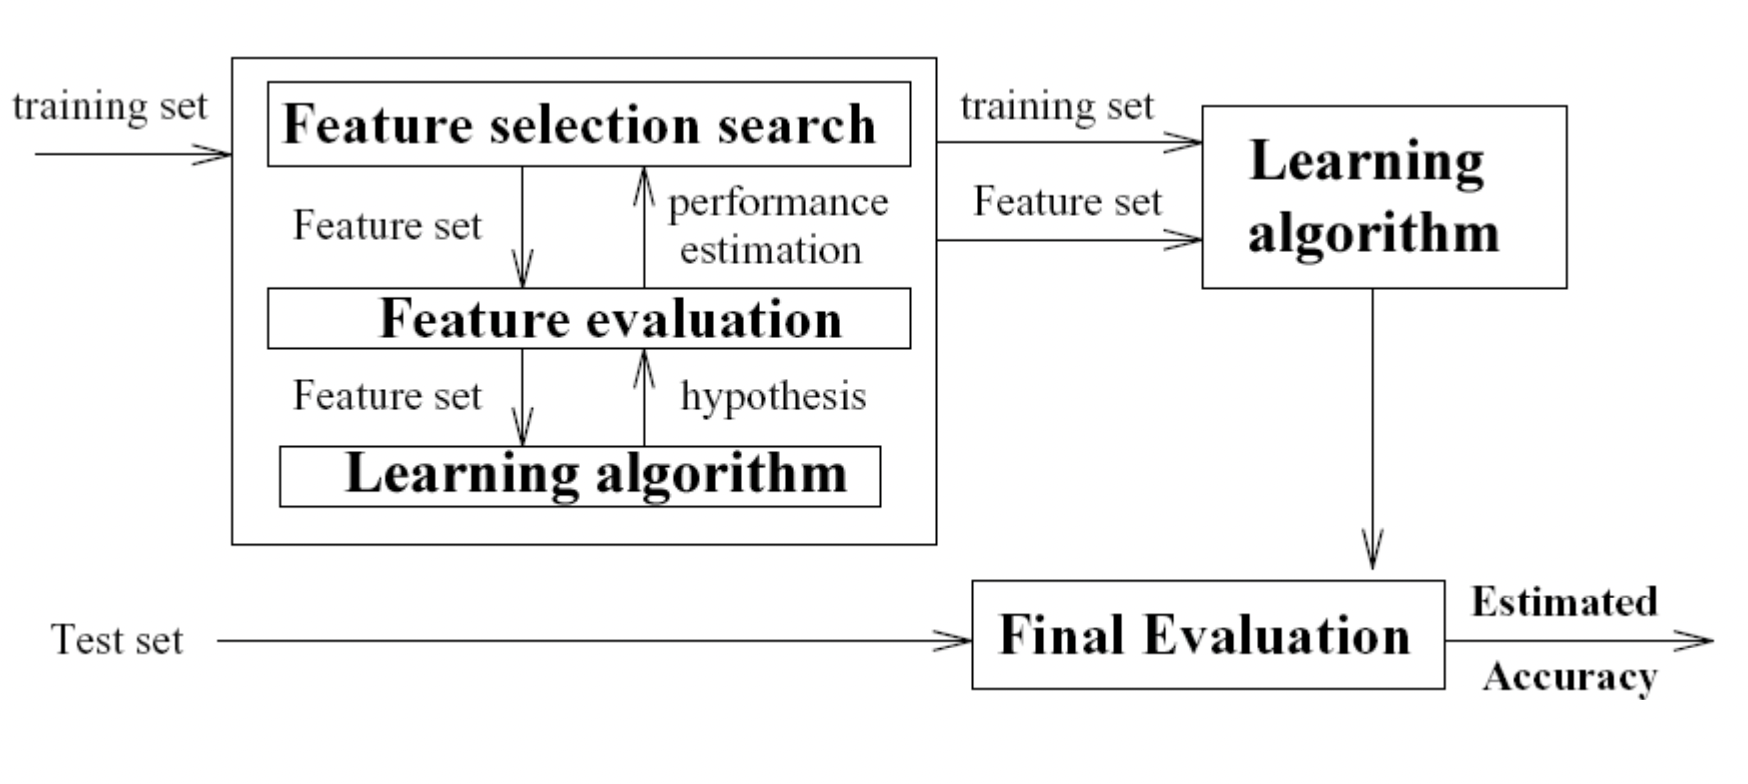   

In [111]:
def wrapper_fs_df(train_X, train_y, test_X, test_y, optimal_n=None):
    '''
    Returns a dataframe with the following wrapper methods: Step Forward Selection, Backward Selection
    and Recursive Feature Elimination applied to the input data
    
    Args:
        train_y (pandas.dataframe) - Train target
        train_X (pandas.dataframe) - Train variables
        test_y (pandas.dataframe) - Test target
        test_X (pandas.dataframe) - Test variables
        optimal_n (int) - Number of features to keep in model
                          if not defined, the function will calculate the optimal number 
                          by selecting the n with the highest score
    Returns: 
        pandas.dataframe
    
    Notes: 
        Step Forward Selection Estimator: Random Forest
        Backward Selection Estimator: Random Forest
        RFE Base Estimator: Logistic Regression
    '''
    # creating dataframe instance and column containig all features
    df = pd.DataFrame()
    df['Features'] = train_X.columns

    # splitting numerical variables from categorical
    X_train_num = train_X.select_dtypes(np.number)
    X_train_cat = train_X.drop(X_train_num.columns, axis=1)
    X_test_num = test_X.select_dtypes(np.number)
    X_test_cat = test_X.drop(X_test_num.columns, axis=1)
    
                                        ############ SFS ##############
    
    # number of possible numerical features
    n_list= list(range(1,len(X_train_num.columns)))
    
    if optimal_n == None: # if number of features to keep is not defined...
        # setting initial high score
        high_score = 0

        for n in n_list:
            model = RandomForestClassifier() # build RF classifier to use in feature selection
            SFS = sfs(model, k_features = n) #  creating SFS instance
            X_train_sfs = SFS.fit_transform(X_train_num, train_y) # transforming the data using SFS
            X_test_sfs = SFS.transform(X_test_num)
            model.fit(X_train_sfs, train_y) # fitting model 
            score = model.score(X_test_sfs, test_y) # getting result with current n features

            if score > high_score: # if current score is higher than the highest until the...
                high_score = score # now current is the highest score
                optimal_n = n_list[n] # and this is optimal number of features

    # creating SFS instance
    SFS = sfs(RandomForestClassifier(), k_features = optimal_n, scoring='f1')
    
    # transforming the data using SFS
    SFS.fit_transform(X = X_train_num, y = train_y)
    
    # getting important features
    sfs_feat = X_train_num.columns[list(SFS.k_feature_idx_)]
    
    # creating SFS column 
    df['Wrapper_SFS'] = df['Features'].apply(lambda x: 'Keep' if x in sfs_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Wrapper_SFS'] = '-'

                                        ############ SBS ##############
    
    if optimal_n == None: # if number of features to keep is not defined...
        # setting initial high score
        high_score = 0

        for n in n_list:
            model = RandomForestClassifier() 
            SBS = sfs(model, forward=False, k_features = n, scoring='f1') #  creating SBS instance
            X_train_sbs = SBS.fit_transform(X_train_num, train_y) # transforming the data using SBS
            X_test_sbs = SBS.transform(X_test_num)
            model.fit(X_train_sbs, train_y) # fitting model 
            score = model.score(X_test_sbs, test_y) # getting result with current n features

            if score > high_score: # if current score is higher than the highest until the...
                high_score = score # now current is the highest score
                optimal_n = n_list[n] # and this is optimal number of features

    # creating SBS instance
    SBS = sfs(RandomForestClassifier(), forward=False, k_features = optimal_n)
    
    # transforming the data using SFS
    SBS.fit_transform(X = X_train_num, y = train_y)
    
    # getting important features
    sbs_feat = X_train_num.columns[list(SBS.k_feature_idx_)]
    
    # creating SBS column 
    df['Wrapper_SBS'] = df['Features'].apply(lambda x: 'Keep' if x in sbs_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Wrapper_SBS'] = '-'
    
                                        ############ RFE ##############
    
    if optimal_n == None: # if number of features to keep is not defined...
        # setting initial high score
        high_score = 0

        for n in n_list:
            model = LogisticRegression() # creating model instance
            rfe = RFE(model, n_features_to_select = n) #  creating RFE instance
            X_train_rfe = rfe.fit_transform(X_train_num, train_y) # transforming the data using RFE
            X_test_rfe = rfe.transform(X_test_num)
            model.fit(X_train_rfe, train_y) # fitting model 
            score = model.score(X_test_rfe, test_y) # getting result with current n features

            if score > high_score: # if current score is higher than the highest until the...
                high_score = score # now current is the highest score
                optimal_n = n_list[n] # and this is optimal number of features

    #  creating RFE instance 
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = optimal_n)

    # transforming the data using RFE
    rfe.fit_transform(X = X_train_num, y = train_y)

    # getting important features
    rfe_feat = list(compress(X_train_num.columns, rfe.support_))

    # creating RFE column 
    df['Wrapper_RFE'] = df['Features'].apply(lambda x: 'Keep' if x in rfe_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Wrapper_RFE'] = '-'
    
                                     ######################################
    # column with final results
    #df['Wrapper_Conclusion'] = df.apply(lambda x: max([x['Wrapper_SFS'], x['Wrapper_SBS'], x['Wrapper_RFE']],
    #                          key=[x['Wrapper_SFS'], x['Wrapper_SBS'], x['Wrapper_RFE']].count), axis=1)
    
    return df

In [112]:
# guarantee reproducibility
np.random.seed(0)

# saving wrapper results
wrapper = wrapper_fs_df(X_train, y_train, X_test, y_test).style

wrapper

,Features,Wrapper_SFS,Wrapper_SBS,Wrapper_RFE,Wrapper_Conclusion
0,Height,Discard,Discard,Keep,Discard
1,High_Cholesterol,Keep,Keep,Discard,Keep
2,Blood_Pressure,Discard,Keep,Keep,Keep
3,Mental_Health,Keep,Keep,Keep,Keep
4,Physical_Health,Keep,Keep,Keep,Keep
5,Checkup,-,-,-,-
6,Diabetes,-,-,-,-
7,Name,-,-,-,-
8,Region,-,-,-,-
9,Education,-,-,-,-


__Notes:__ 

> 1 - __BMI__ seems to add no value to the models, since all wrapping methods discard it <p>
> 2 - __Mental Health__, __Physical Health__ and __Diabetes Contact__, all stay in all feature selection tests, __these were also the features with higher correlation with the target__

>> 2 - __Filter Methods__ - rank features or feature subsets independently of the predictor (classifier)<p>
>> Filter methods are generally used as preprocessing steps, and their selection is independent of any machine learning algorithm. Features are instead selected based on their scores in various statistical tests to determine their correlation with the outcome variable, which is subjective, it'be applied filter methods like: <p>
>>>> * __Spearman Correlation Coefficients__ - __Correlation is a measure of the linear relationship of 2 or more variables__. The logic behind using correlation for feature selection is that the __good variables are highly correlated with the target__. Furthermore, variables __should be correlated with the target but should be uncorrelated among themselves__. It'll be used the __Spearman Coefficients__ since it's a non-parametric test and the treshold will be +/- 0.50<p>
>>>> * __Fisher score__ is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. The top number of optimal features, will be the ones to keep <p>
>>>> * __Chi-Square__ - The  __𝜒2  test is used in statistics to test the independence of two events__. More specifically in feature selection it's used to test __whether the occurrence of a specific term and the occurrence of a specific class are independent__<p>
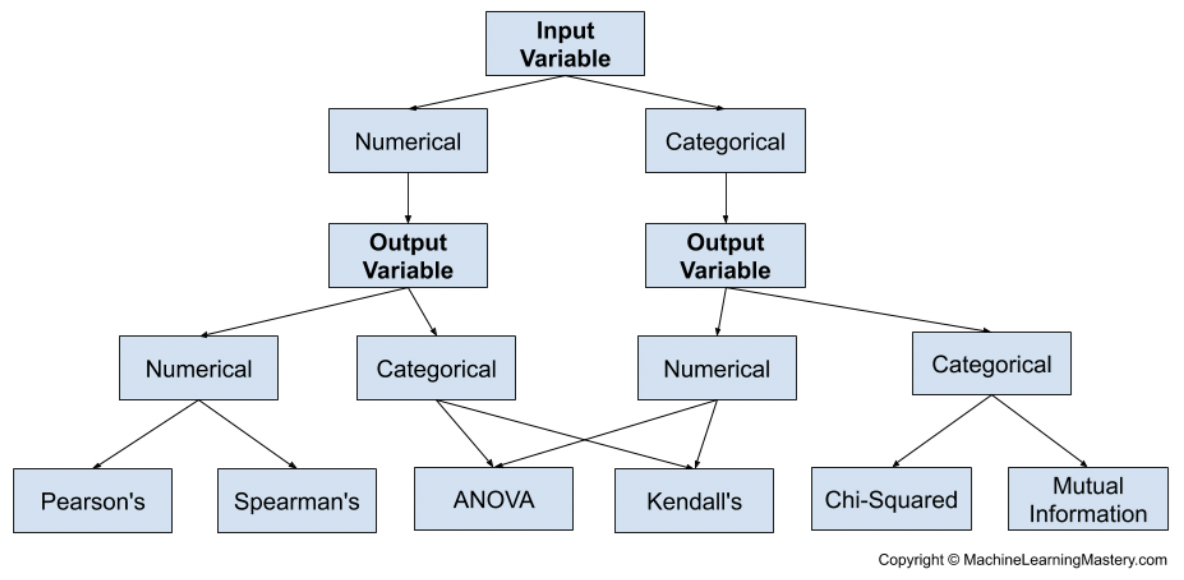

In [149]:
df = pd.DataFrame()
df['Features'] = X_train.columns

# splitting numerical variables from categorical
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.drop(X_train_num.columns, axis=1)
X_test_num = X_train.select_dtypes(np.number)
X_test_cat = X_train.drop(X_test_num.columns, axis=1)

# joi
                                    ############ SPEARMAN ##############

# number of possible numerical features
n_list= X_train_num.columns

# getting important features
spear_feat = []
for col in X_train.columns: 
    if (np.round(stats.spearmanr(X_train[col], y_train)[0],2) > .5) and (col in X_train_num.columns) :
        spear_feat.append('Keep')
    elif (np.round(stats.spearmanr(X_train[col], y_train)[0],2) <= .5) and (col in X_train_num.columns) :
        spear_feat.append('Discard')
    else: 
        spear_feat.append('-')

# creating Spearman column 
df['Filter_Spearman'] = spear_feat
df.style

,Features,Filter_Spearman
0,Height,Discard
1,High_Cholesterol,Discard
2,Blood_Pressure,Discard
3,Mental_Health,Discard
4,Physical_Health,Discard
5,Checkup,-
6,Diabetes,-
7,Name,-
8,Region,-
9,Education,-


In [ ]:
def filter_fs_df(train_X, train_y, test_X, test_y, optimal_n=None):
    '''
    Returns a dataframe with the following filter methods: Spearman Correlation, Fisher score
    and Chi-Square applied to the input data
    
    Args:
        train_y (pandas.dataframe) - Train target
        train_X (pandas.dataframe) - Train variables
        test_y (pandas.dataframe) - Test target
        test_X (pandas.dataframe) - Test variables
        optimal_n (int) - Number of features to keep in model
                          if not defined, the function will calculate the optimal number 
                          by selecting the n with the highest score
    Returns: 
        pandas.dataframe
    
    Notes: 
        Step Forward Selection Estimator: Random Forest
        Backward Selection Estimator: Random Forest
        RFE Base Estimator: Logistic Regression
    '''
    # creating dataframe instance and column containig all features
    df = pd.DataFrame()
    df['Features'] = train_X.columns

    # splitting numerical variables from categorical
    X_train_num = train_X.select_dtypes(np.number)
    X_train_cat = train_X.drop(X_train_num.columns, axis=1)
    X_test_num = test_X.select_dtypes(np.number)
    X_test_cat = test_X.drop(X_test_num.columns, axis=1)
    
                                        ############ SPEARMAN ##############
    
    # getting important features
    spear_feat = []
    for col in train_X.columns: 
        if (np.round(stats.spearmanr(train_X[col], train_y)[0],2) > .5) & (col in X_train_num.columns):
            spear_feat.append('Keep')
        elif (np.round(stats.spearmanr(train_X[col], train_y)[0],2) <= .5) & (col in X_train_num.columns) 
            spear_feat.append('Discard')
        else: 
            spear_feat.append('-')
    
    # creating Spearman column 
    df['Filter_Spearman'] = spear_feat

                                        ############ SBS ##############
    
    if optimal_n == None: # if number of features to keep is not defined...
        # setting initial high score
        high_score = 0

        for n in n_list:
            model = RandomForestClassifier() 
            SBS = sfs(model, forward=False, k_features = n, scoring='f1') #  creating SBS instance
            X_train_sbs = SBS.fit_transform(X_train_num, train_y) # transforming the data using SBS
            X_test_sbs = SBS.transform(X_test_num)
            model.fit(X_train_sbs, train_y) # fitting model 
            score = model.score(X_test_sbs, test_y) # getting result with current n features

            if score > high_score: # if current score is higher than the highest until the...
                high_score = score # now current is the highest score
                optimal_n = n_list[n] # and this is optimal number of features

    # creating SBS instance
    SBS = sfs(RandomForestClassifier(), forward=False, k_features = optimal_n)
    
    # transforming the data using SFS
    SBS.fit_transform(X = X_train_num, y = train_y)
    
    # getting important features
    sbs_feat = X_train_num.columns[list(SBS.k_feature_idx_)]
    
    # creating SBS column 
    df['Wrapper_SBS'] = df['Features'].apply(lambda x: 'Keep' if x in sbs_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Wrapper_SBS'] = '-'
    
                                        ############ RFE ##############
    
    if optimal_n == None: # if number of features to keep is not defined...
        # setting initial high score
        high_score = 0

        for n in n_list:
            model = LogisticRegression() # creating model instance
            rfe = RFE(model, n_features_to_select = n) #  creating RFE instance
            X_train_rfe = rfe.fit_transform(X_train_num, train_y) # transforming the data using RFE
            X_test_rfe = rfe.transform(X_test_num)
            model.fit(X_train_rfe, train_y) # fitting model 
            score = model.score(X_test_rfe, test_y) # getting result with current n features

            if score > high_score: # if current score is higher than the highest until the...
                high_score = score # now current is the highest score
                optimal_n = n_list[n] # and this is optimal number of features

    #  creating RFE instance 
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = optimal_n)

    # transforming the data using RFE
    rfe.fit_transform(X = X_train_num, y = train_y)

    # getting important features
    rfe_feat = list(compress(X_train_num.columns, rfe.support_))

    # creating RFE column 
    df['Wrapper_RFE'] = df['Features'].apply(lambda x: 'Keep' if x in rfe_feat else 'Discard')
    df.loc[df['Features'].isin(X_train_cat.columns), 'Wrapper_RFE'] = '-'
    
                                     ######################################
    # column with final results
    #df['Wrapper_Conclusion'] = df.apply(lambda x: max([x['Wrapper_SFS'], x['Wrapper_SBS'], x['Wrapper_RFE']],
    #                          key=[x['Wrapper_SFS'], x['Wrapper_SBS'], x['Wrapper_RFE']].count), axis=1)
    
    return df

>> 3 - __Embedded Methods__ - learn which features best contribute to the accuracy of the model while the model is being created <p>
>> Embedded methods combine the __best features of filtering and wrapping methods by implementing algorithms with built-in methods for selecting features__, standard embedded methods are: <p>
>>>> * __Forward Selection__ - Starts with __no feature in the model and iterate forward__. On each subsequent repetition, __add the feature that improves the model__ the most __until the addition of a new variable does not improve its performance__ <p>
>>>> * __Backward Selection__ - Starts with __all the features during backward elimination and remove the least significant feature at every iteration__, which improves the model's performance. This process is __repeated until no more improvement is observed__  <p>
>>>> * __Recursive Feature Elimination__ - __The algorithm aims to find the best performing subset of features by using greedy optimization__ (making the locally optimal choice at each stage with the hope of finding the global optimum). Each iteration __creates a new model and keeps aside the best or worst performing features__. The next model is constructed using the remaining features __until all the features have been exhausted__. The features are then __ranked according to their elimination order__ <p>

### CHI-SQUARE

In [38]:
def TestIndependence(X, y, var, alpha = .05): 
    '''
    '''
    df_observed = pd.crosstab(y, X) 
    chi2, p, dof, expected = stats.chi2_contingency(df_observed.values)
    df_expected = pd.DataFrame(expected, columns=df_observed.columns, index = df_observed.index)
    if p < alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)
    return df_observed
    
for var in X_train.select_dtypes(object):
    TestIndependence(X_train[var], y_train, var)

### Categorical Data

| __Predictor__ | __Chi-Square__ | 
| --- | --- | 
| Checkup | Keep |  
| Diabetes | Keep | 
| Name | Discard|
| Region | Discard | 
| Education | Discard | 
| Smoking_Habit | Keep |
| Drinking_Habit | Keep |
| Exercise | Keep |
| Fruit_Habit | Keep |
| Water_Habit | Discard |


In [37]:
X_train.drop(['Name', 'Region', 'Education', 'Water_Habit'], axis=1, inplace=True)
X_test.drop(['Name', 'Region', 'Education', 'Water_Habit'], axis=1, inplace=True)

In [ ]:
### NUMERICAL DATA SELECTION

In [ ]:
### FINAL SELECTION

### 4.2 Standardization Study

In [ ]:
def best_normalization(train, test): 
    '''
    '''
classifier = MLPClassifier().fit(X_train, y_train)

classifier.score(X_test, y_test)

In [ ]:
min_max = MinMaxScaler().fit(X_train)
min_max_X_train = min_max.transform(X_train)
min_max_X_test = min_max.transform(X_test)
model_min_max = MLPClassifier().fit(min_max_X_train, y_train)
model_min_max.score(min_max_X_test, y_test)

In [ ]:
min_max2 = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)
min_max2_X_train = min_max2.transform(X_train)
min_max2_X_test = min_max2.transform(X_test)
model_min_max2 = MLPClassifier().fit(min_max2_X_train, y_train)
model_min_max2.score(min_max2_X_test, y_test)

In [ ]:
robust = RobustScaler().fit(X_train)
robust_X_train = robust.transform(X_train)
robust_X_test = robust.transform(X_test)
model_robust = MLPClassifier().fit(robust_X_train, y_train)
model_robust.score(robust_X_test, y_test)

In [ ]:
x = ['Raw','MinMax[0,1]','MinMax[-1,1]','Robust']
y = [classifier.score(X_test, y_test),
     model_min_max.score(min_max_X_test, y_test), 
     model_min_max2.score(min_max2_X_test, y_test),
     model_robust.score(robust_X_test, y_test)]

# Plot
plt.figure(figsize = (8,6))
sns.barplot(x, y,palette='Blues')

# Layout
plt.title('Scalling Results', fontsize = 18, fontweight='bold')
plt.xticks(fontsize = 13)

plt.show()

__Notes:__

> 1 - __From the diferent scalling techniques, the MinMax [0, 1] Scaler had the better score by a slight margin. It'll be the one used moving forward.__

In [40]:
# filtering test data with train data columns 
test_data = test_data[X_train.columns]

# splitting important non-metric features (categorical) from metric (numerical) 
categorical = X_train.select_dtypes(object)

# Change categorical variables into numeric representation
X_train = pd.get_dummies(X_train, columns = categorical)

X_test = pd.get_dummies(X_test, columns = categorical)

test_data = pd.get_dummies(test_data, columns = categorical)

# Change Yes and No to 1 and 0s
X_train['Exercise'] = X_train['Exercise'].map({'Yes': 1, 'No': 0})
X_train['Smoking_Habit'] = X_train['Smoking_Habit'].map({'Yes': 1, 'No': 0})

X_test['Exercise'] = X_test['Exercise'].map({'Yes': 1, 'No': 0})
X_test['Smoking_Habit'] = X_test['Smoking_Habit'].map({'Yes': 1, 'No': 0})

test_data['Exercise'] = test_data['Exercise'].map({'Yes': 1, 'No': 0})
test_data['Smoking_Habit'] = test_data['Smoking_Habit'].map({'Yes': 1, 'No': 0})

In [ ]:
# Plotting feature importance

def plot_feature_importances(model, data):
    ''' 
    '''
    n_features = data.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.title('Feature Importance Plot',fontsize=24, fontweight='bold')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel('Feature importance', fontsize=18) 
    plt.ylabel('Feature') 
    plt.axvline(x=0.02, color = 'lightblue') 
    plt.axvline(x=0.04, color = 'g') 
    plt.show()
     
plot_feature_importances(entropy_importance, X)

In [ ]:
# Creating dataset with features with importance above .04 (green line in plot above)
def tree_feature_importances(model, data):
    col_names = []
    col_importance = []
    for idx, col in enumerate(data): 
        col_names.append(col)
        col_importance.append(model.feature_importances_[idx])
    ft_importance_df=pd.DataFrame({'Features' : col_names, 'Importance' : col_importance})
    ft_importance_df=ft_importance_df.sort_values('Importance',ascending = False)
    ft_importance_df=ft_importance_df.loc[ft_importance_df.Importance > .02].reset_index().drop('index',axis=1)
    return ft_importance_df

tree_feature_importances(entropy_importance, X).style

In [ ]:
# FILTERING important columns
important_cols = df_feature_importances(entropy_importance,X)['Features'].values

X_train = X_train[important_cols]

X_test = X_test[important_cols]

test_data =test_data[important_cols]

In [ ]:
# Checking multicollinearity before modelling

# Correlations analysis
# Plot
cmap = sns.color_palette('Blues', as_cmap=True)

# Computing the correlation matrix
corr = X_train.corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize = (25, 20))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = .5, cbar_kws = {'shrink': .5}, annot = True, fmt = '.2f', 
           annot_kws={'size':25})

#customize
plt.title('Correlation Heatmap',fontsize = 35, fontweight = 'bold')


plt.show()

>> * Data Exploration - Exploring the data with some high-level aggregate statistical analysis, to have a preliminary understanding of patterns and start hypothesizing about how the attributes relate. <p>

### Evaluation Functions

In [ ]:
def evaluate_model(model, X, y):
    '''
    '''
    kf = StratifiedShuffleSplit(n_splits=10, random_state=seed)
    score_train = []
    score_test = []
    timer = []
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        begin = time.perf_counter()
        model.fit(X_train, y_train)
        end = time.perf_counter()
        
        value_train = model.score(X_train, y_train)
        value_test = model.score(X_test,y_test)
        
        # Appends the accuracy, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end - begin)
        
    # Calculate the average and the std for each measure 
    # (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time),\
           str(avg_train) + '+/-' + str(std_train),\
           str(avg_test) + '+/-' + str(std_test)

In [ ]:
def performance_metrics(y_Train,
                        y_PredTrain,
                        y_Test,
                        y_PredTest):
    '''
    Creates Dataframe with the main benchmark metrics for Classfication models
    
    Args: 
        y_Train -      Series with target values used to train model
        y_PredTrain -  Series with predicted values from y_Train
        y_Test -       Series with test values used to validate model
        y_PredTest -   Series with predicted values from y_Test
        
    Returns: 
        pandas.core.frame.DataFrame
    '''
    # Columns
    measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
    
    # Results for train data
    train_results = [
                round(metrics.accuracy_score(y_Train, y_PredTrain),3),  # Calculating accuracy
                round(metrics.precision_score(y_Train, y_PredTrain),3),  # Calculating precision
                round(metrics.recall_score(y_Train, y_PredTrain),3),  # Calculating recall
                round(metrics.f1_score(y_Train, y_PredTrain),3),  # Calculating f1 score
                round(metrics.roc_auc_score(y_Train, y_PredTrain),3)  # Calculating ROC area under the curve
                ]
    # Results for test data
    test_results = [
               round(metrics.accuracy_score(y_Test, y_PredTest),3),  # Calculating accuracy
               round(metrics.precision_score(y_Test, y_PredTest),3),  # Calculating precision
               round(metrics.recall_score(y_Test, y_PredTest),3),  # Calculating recall
               round(metrics.f1_score(y_Test, y_PredTest),3),  # Calculating f1 score
               round(metrics.roc_auc_score(y_Test, y_PredTest),3)  # Calculating ROC area under the curve
               ]
    
    results = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test': test_results})
    
    # Comparison column
    results['Difference'] = round(results['Train'] - results['Test'], 2) 
    
    return results

In [ ]:
# Function to plot confusion matrix
# Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

def make_confusion_matrix(cf,
                          group_names = None,
                          categories ='auto',
                          count = True,
                          percent = True,
                          cbar = True,
                          xyticks = True,
                          xyplotlabels = True,
                          sum_stats = True,
                          figsize = None,
                          cmap = 'Blues',
                          title = None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    
    Args: 
        cf -           Confusion matrix to be passed in
        group_names -  List of strings that represent the labels row by row to be shown in each square
        categories -   List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
        count -        If True, show the raw number in the confusion matrix. Default is True
        normalize -    If True, show the proportions for each category. Default is True
        cbar -         If True, show the color bar. The cbar values are based off the values in the confusion matrix
                       Default is True
        xyticks -      If True, show x and y ticks. Default is True
        xyplotlabels - If True, show 'True Label' and 'Predicted Label' on the figure. Default is True
        sum_stats -    If True, display summary statistics below the figure. Default is True
        figsize -      Tuple representing the figure size. Default will be the matplotlib rcParams value
        cmap -         Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
        title -        Title for the heatmap. Default is None
        
    Returns: 
        Confusion Matrix Plot
    '''
    # Generating text inside each matrix square
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ['{}\n'.format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ['{0:0.0f}\n'.format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ['{0:.2%}'.format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f'{v1}{v2}{v3}'.strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


        # Generating summary statistics & text for summary stats
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = '\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}'.format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = '\n\nAccuracy={:0.3f}'.format(accuracy)
    else:
        stats_text = ''


    # Setting figure parameters according to other arguments
    if figsize == None:
        # Gets default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        # Doesn't show categories if xyticks is False
        categories = False

    # Making the heatmap vizualization
    plt.figure(figsize = figsize)
    ax = sns.heatmap(cf, 
                     annot = box_labels, fmt = '',
                     cmap = cmap, cbar = cbar,
                     xticklabels = categories,
                     yticklabels = categories)

    if xyplotlabels:
        plt.ylabel('True label', fontsize = 14)
        plt.xlabel('Predicted label' + stats_text, fontsize = 14)
    else:
        plt.xlabel(stats_text, fontsize = 14)
    
    if title:
        plt.title(title)

### Models

> ### Decision Tree

A Decision Tree is a model composed of a collection of questions organized hierarchically in the shape of a tree, usually represented with the root (the first node) at the top.<br><br> The questions are usually called a condition, a split, or a test. Each non-leaf node contains a condition, and each leaf node contains a prediction.

<img align='center' width='500' height='500' src='https://developers.google.com/static/machine-learning/decision-forests/images/DecisionTree.png'>

> * Hyper-tuning results (using GridSearch): <p>
>> * Grid search best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 2, 'splitter': 'best'} <p>
>> * Grid search best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [ ]:
# Setting models seed
seed = 0

# Creating DT Model
DTmodel = DecisionTreeClassifier(class_weight = None,
                                 criterion = 'entropy',
                                 max_depth = 50,
                                 min_samples_split = 2,
                                 splitter = 'best',
                                 random_state = seed)

DTmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = DTmodel.predict(X_test)
y_pred_train = DTmodel.predict(X_train)

# Getting model scores
value_train = round(DTmodel.score(X_train, y_train), 3)
value_test = round(DTmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Layout (only needs to be defined once)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Not Diseased', 'Diseased']

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Random Forest

We can define the Random Forest Classifier as set of Decision Trees.



Grid search best parameters: {'criterion': 'entropy'} 

Grid search best parameters: RandomForestClassifier(criterion='entropy')

Grid search best parameters: {'bootstrap': True, 'max_depth': 10, 'oob_score': True, 'warm_start': True} 

Grid search best parameters: RandomForestClassifier(criterion='entropy', max_depth=10, oob_score=True,
                       warm_start=True)
                       
Grid search best parameters: {'class_weight': 'balanced_subsample', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2} 

Grid search best parameters: RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, oob_score=True, warm_start=True)

In [ ]:
# Creating RF Model full grid
RFmodel = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 20,
                                 bootstrap = True,
                                 oob_score = True,
                                 warm_start = True,
                                 max_features = 'sqrt',
                                 class_weight = 'balanced_subsample',
                                 min_samples_leaf = 1,
                                 min_samples_split = 2,
                                 random_state = seed
                                 )

RFmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = RFmodel.predict(X_test)
y_pred_train = RFmodel.predict(X_train)

# Getting model scores
value_train = round(RFmodel.score(X_train, y_train), 3)
value_test = round(RFmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   \033[1mBenchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### AdaBoost Classifier

Ada-boost or Adaptive Boosting is one of ensemble boosting classifier that combines multiple classifiers to increase the accuracy of classifiers and can be used for both classification and regression problems.

The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. Adaboost should meet two conditions:

1. The classifier should be trained interactively on various weighed training examples.
2. In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

In [ ]:
ADAmodel = AdaBoostClassifier(n_estimators = 150,
                              base_estimator = DTmodel,
                              algorithm = 'SAMME',
                              learning_rate = .1,
                              random_state = seed)

ADAmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = ADAmodel.predict(X_test)
y_pred_train = ADAmodel.predict(X_train)

# Getting model scores
value_train = round(ADAmodel.score(X_train, y_train), 3)
value_test = round(ADAmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   \033[1mBenchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Gradient Boosting Classifier

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.



Grid search best parameters: {'learning_rate': 1, 'max_features': 1, 'n_estimators': 200} 

Grid search best parameters: GradientBoostingClassifier(learning_rate=1, max_features=1, n_estimators=200)

In [ ]:
# Creating GBC Model #99
GBCmodel = GradientBoostingClassifier(n_estimators = 200,
                                      warm_start = True,
                                      max_features = 5,
                                      learning_rate = 1,
                                      max_depth = 10, 
                                      min_samples_split = .1,
                                      min_samples_leaf = .01,
                                      tol = 1e-10,
                                      random_state = seed) 

GBCmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = GBCmodel.predict(X_test)
y_pred_train = GBCmodel.predict(X_train)

# Getting model scores
value_train = round(GBCmodel.score(X_train, y_train), 3)
value_test = round(GBCmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### XGBoost Classifier

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
# Creating XGB Model
#booster: Specify which booster to use: gbtree or dart gblinear
# tree_method: approx', 'auto', 'exact', 'gpu_hist', 'hist'
XGBmodel = XGBClassifier(n_estimators = 300,
                         booster = 'gbtree',
                         tree_method = 'exact',
                         max_depth = 10,
                         learning_rate = .1,
                         eta = .01,
                         #gamma = 1e-10,
                         #sampling_method = 'gradient_based',
                         random_state = seed) 

XGBmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = XGBmodel.predict(X_test)
y_pred_train = XGBmodel.predict(X_train)

# Getting model scores
value_train = round(XGBmodel.score(X_train, y_train), 3)
value_test = round(XGBmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Extremely Randomized Trees Classifier

Extremely Randomized Trees Classifier is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

In [ ]:
ETCmodel = ExtraTreesClassifier(criterion = 'entropy',
                                max_depth = 150,
                                min_samples_split = 2,
                                max_features = 'auto',
                                bootstrap = False,
                                oob_score = False,
                                warm_start = False,
                                class_weight = 'balanced',
                                min_samples_leaf = 1,
                                random_state=seed).fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = ETCmodel.predict(X_test)
y_pred_train = ETCmodel.predict(X_train)

# Getting model scores
value_train = round(ETCmodel.score(X_train, y_train), 3)
value_test = round(ETCmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

In [ ]:
# Normalizing data
train_scaler = MinMaxScaler(feature_range = (-1, 1)).fit_transform(X_train)
test_scaler = MinMaxScaler(feature_range = (-1, 1)).fit_transform(X_test)

X_train[X_train.columns] = train_scaler
X_test[X_test.columns] = test_scaler

> ### Logistic Regression

Logistic regression is a process of modelling the probability of a discrete outcome given an input variable. 

For the this model, only the most important features will be used


Grid search best parameters: {'C': 10.0, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs'} 

Grid search best estimators: LogisticRegression(C=10.0, max_iter=10)

LogisticRegression(C=10, dual=True, fit_intercept=False, max_iter=200,
                   random_state=15, solver='liblinear')

In [ ]:
# Creating LR Model
LRmodel = LogisticRegression(max_iter = 200,
                             solver = 'liblinear',
                             C = 10, 
                             penalty = 'l2',
                             dual = True,
                             fit_intercept = False,
                             multi_class = 'auto',
                             class_weight = None,
                             random_state = seed)

LRmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = LRmodel.predict(X_test)
y_pred_train = LRmodel.predict(X_train)

# Getting model scores
value_train = round(LRmodel.score(X_train, y_train), 3)
value_test = round(LRmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

In [ ]:
# Stratifying data with Shuffle split & feature selection
evaluate_model(LRmodel, X_train,y_train)

# Predicting again target for X_train and X_test 
y_pred = LRmodel.predict(X_test)
y_pred_train = LRmodel.predict(X_train)

# Getting new scores
value_train = round(LRmodel.score(X_train, y_train), 3)
value_test = round(LRmodel.score(X_test, y_test), 3)

# Comparing model results with stratified data & feature selection
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### K-Nearest Neighbor

The K-Nearest neighbors algorithm, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.


Grid search best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} 

Grid search best parameters: KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [ ]:
# Creating KN Model
KNmodel = KNeighborsClassifier(n_neighbors = 1,
                               leaf_size = 1,
                               p = 1,
                               weights = 'uniform',
                               algorithm = 'auto')

KNmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = KNmodel.predict(X_test)
y_pred_train = KNmodel.predict(X_train)

# Getting model scores
value_train = round(KNmodel.score(X_train, y_train), 3)
value_test = round(KNmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

In [ ]:
# Stratifying data with Shuffle split & feature selection
evaluate_model(KNmodel, X_train,y_train)

# Predicting again target for X_train and X_test 
y_pred = KNmodel.predict(X_test)
y_pred_train = KNmodel.predict(X_train)

# Getting new scores
value_train = round(KNmodel.score(X_train, y_train), 3)
value_test = round(KNmodel.score(X_test, y_test), 3)

# Comparing model results with stratified data & feature selection
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [ ]:
bagging = BaggingClassifier(KNmodel,
                            n_estimators=5).fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = bagging.predict(X_test)
y_pred_train = bagging.predict(X_train)

# Getting model scores
value_train = round(bagging.score(X_train, y_train), 3)
value_test = round(bagging.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

> ### Neural Network

A Neural Network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, Neural Networks refer to systems of neurons, either organic or artificial in nature.

In [ ]:
# Creating NN Model
NNmodel = MLPClassifier(activation = 'tanh',
                        hidden_layer_sizes = 120, 
                        learning_rate = 'adaptive', 
                        learning_rate_init = .0505, 
                        solver = 'adam',
                        power_t = 1e-10,
                        max_iter = 500,
                        n_iter_no_change=1000,
                        random_state = seed)

NNmodel.fit(X_train, y_train)

In [ ]:
# Predicting target for X_train and X_test
y_pred = NNmodel.predict(X_test)
y_pred_train = NNmodel.predict(X_train)

# Getting model scores
value_train = round(NNmodel.score(X_train, y_train), 3)
value_test = round(NNmodel.score(X_test, y_test), 3)

# Creating confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred)

# Plot
make_confusion_matrix(cf, 
                      group_names = labels,
                      categories = categories,
                      figsize = (9,6))
plt.show()

# Creating classification report
print(classification_report(y_test, y_pred, target_names = categories))

# Metrics dataframe report
print('\n\n   Benchmarking Dataframe')
display(performance_metrics(y_train, y_pred_train, y_test, y_pred))

### Model Selection

### Deployment 

In [ ]:
RFmodel.predict(test_data)

In [ ]:
final_data = pd.DataFrame()
final_data['PatientID'] = test_data.reset_index()['PatientID']
final_data['Disease'] = RFmodel.predict(test_data)

final_data.to_csv(os.path.join(path, 'final.csv'))

### Conclusions